## MIDTERM TEST

   Hang_SX  So_Km(1000Km)  Nam_Su_Dung  Gia_Xe(1000$)
0     Audi          111.0            6          19.00
1     Audi           56.5            3          33.00
2      BMW           91.8            5          26.10
3     Audi           36.2            2          40.50
4      BMW           75.0            4          32.50
5      BMW           95.0            5          26.75
6     Audi           83.7            5          32.00
7      BMW          115.9            6          19.30
8     Audi          146.5            8          12.00
9     Audi          107.8            6          22.00
10    Audi          133.6            7          17.90
11     BMW          127.1            7          19.50
12     BMW           94.9            5          26.20
13     BMW           94.5            4          27.50
14    Audi          132.7            7          19.40
15     BMW           40.9            3          35.00
16     BMW           45.1            2          35.50
17    Audi          111.1   

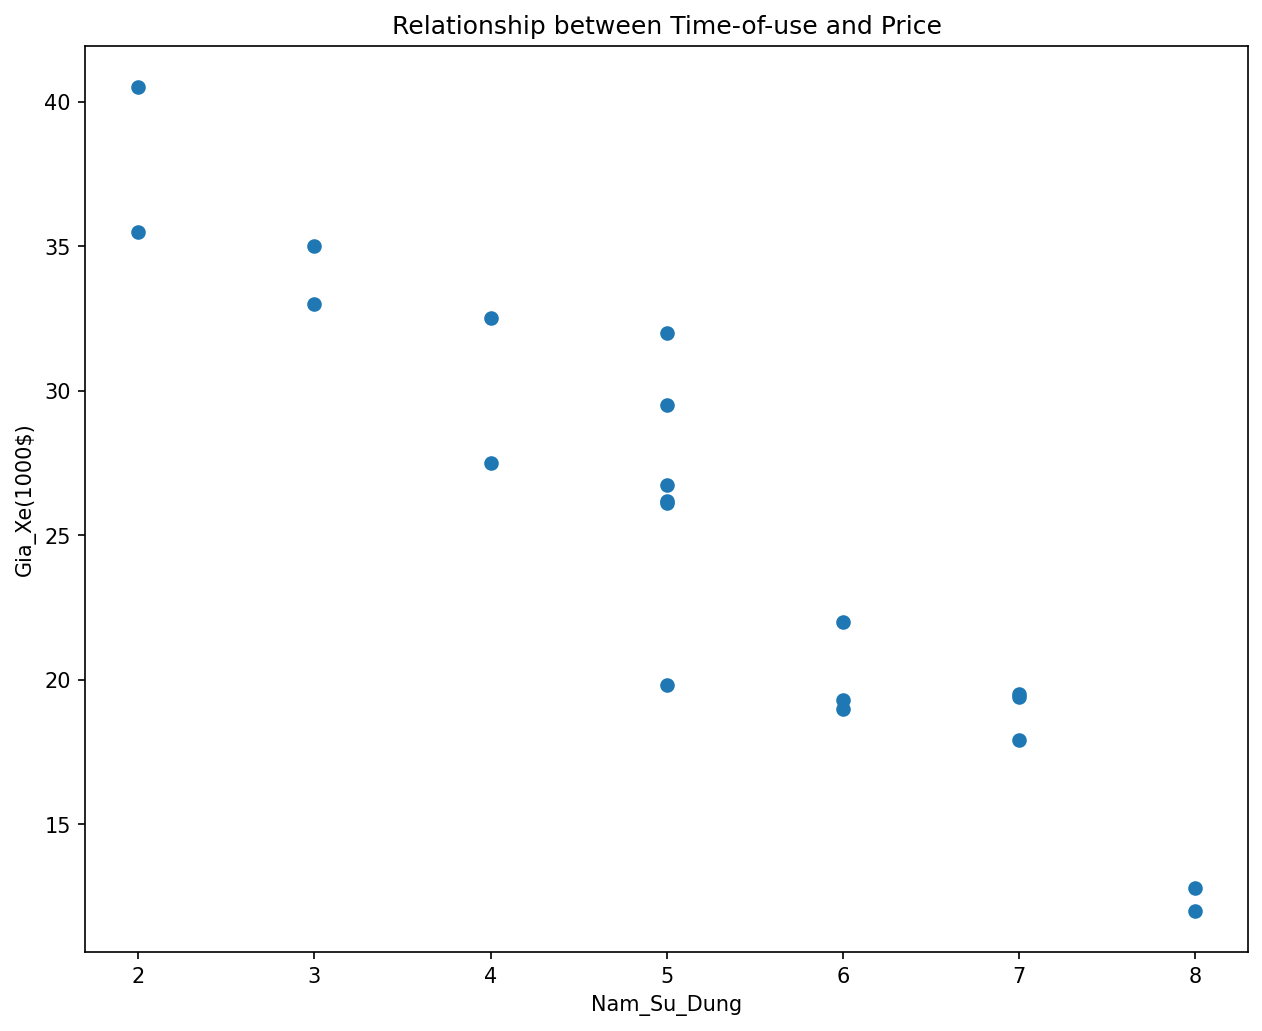

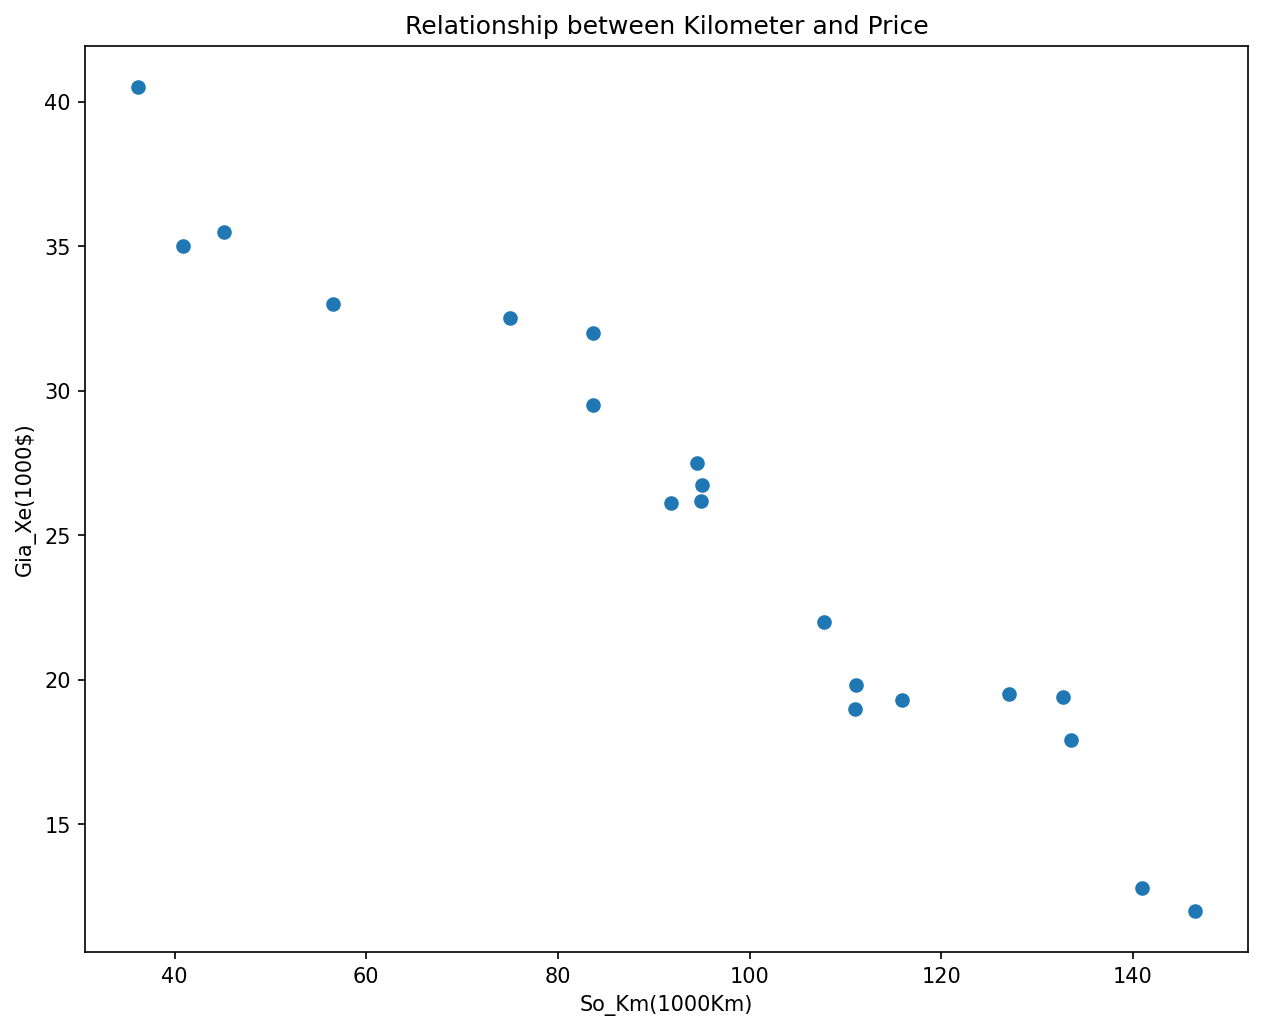

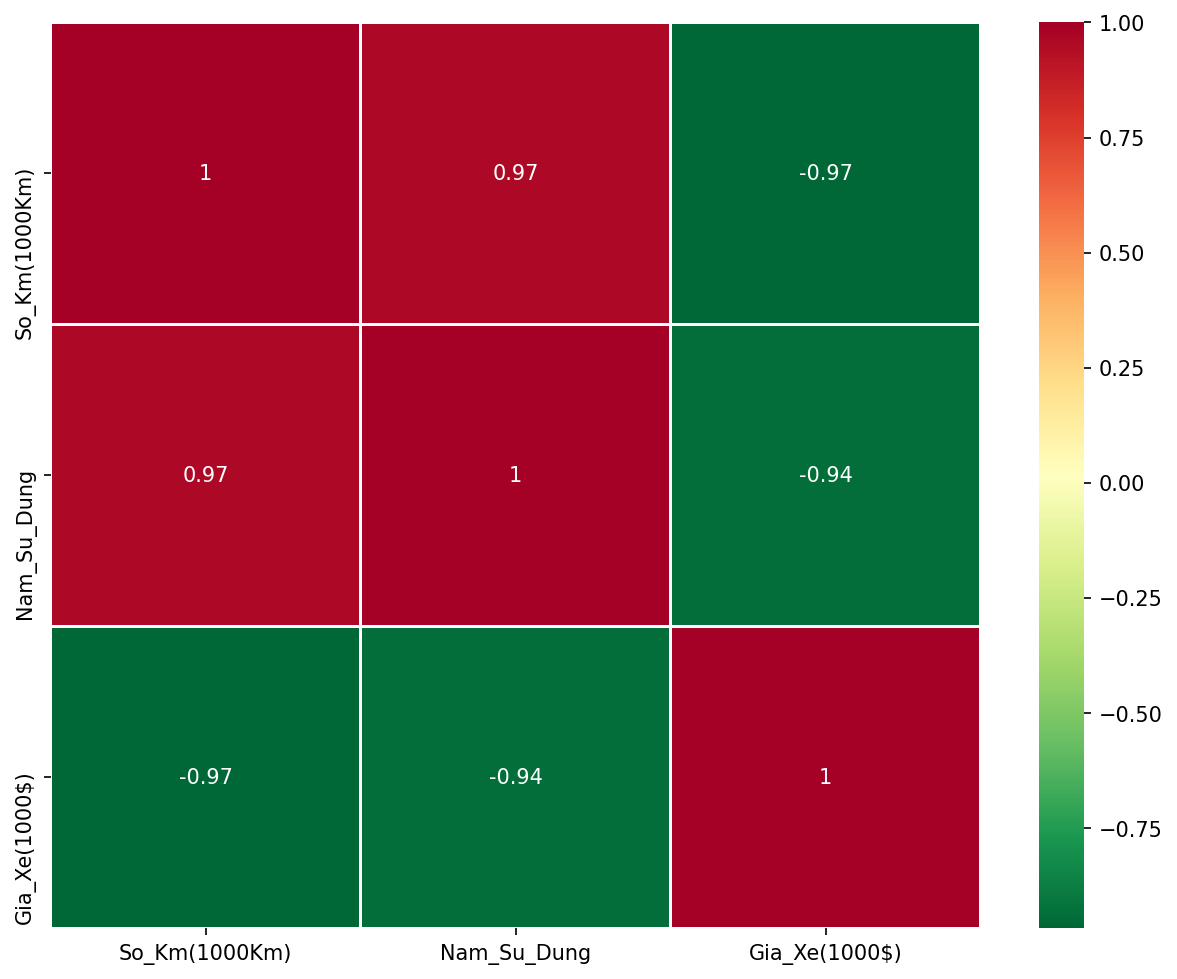

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     126.3
Date:                Sun, 05 Sep 2021   Prob (F-statistic):           6.28e-11
Time:                        14:29:28   Log-Likelihood:                -41.555
No. Observations:                  20   AIC:                             89.11
Df Residuals:                      17   BIC:                             92.10
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.5429      1.480     32.118      0.0

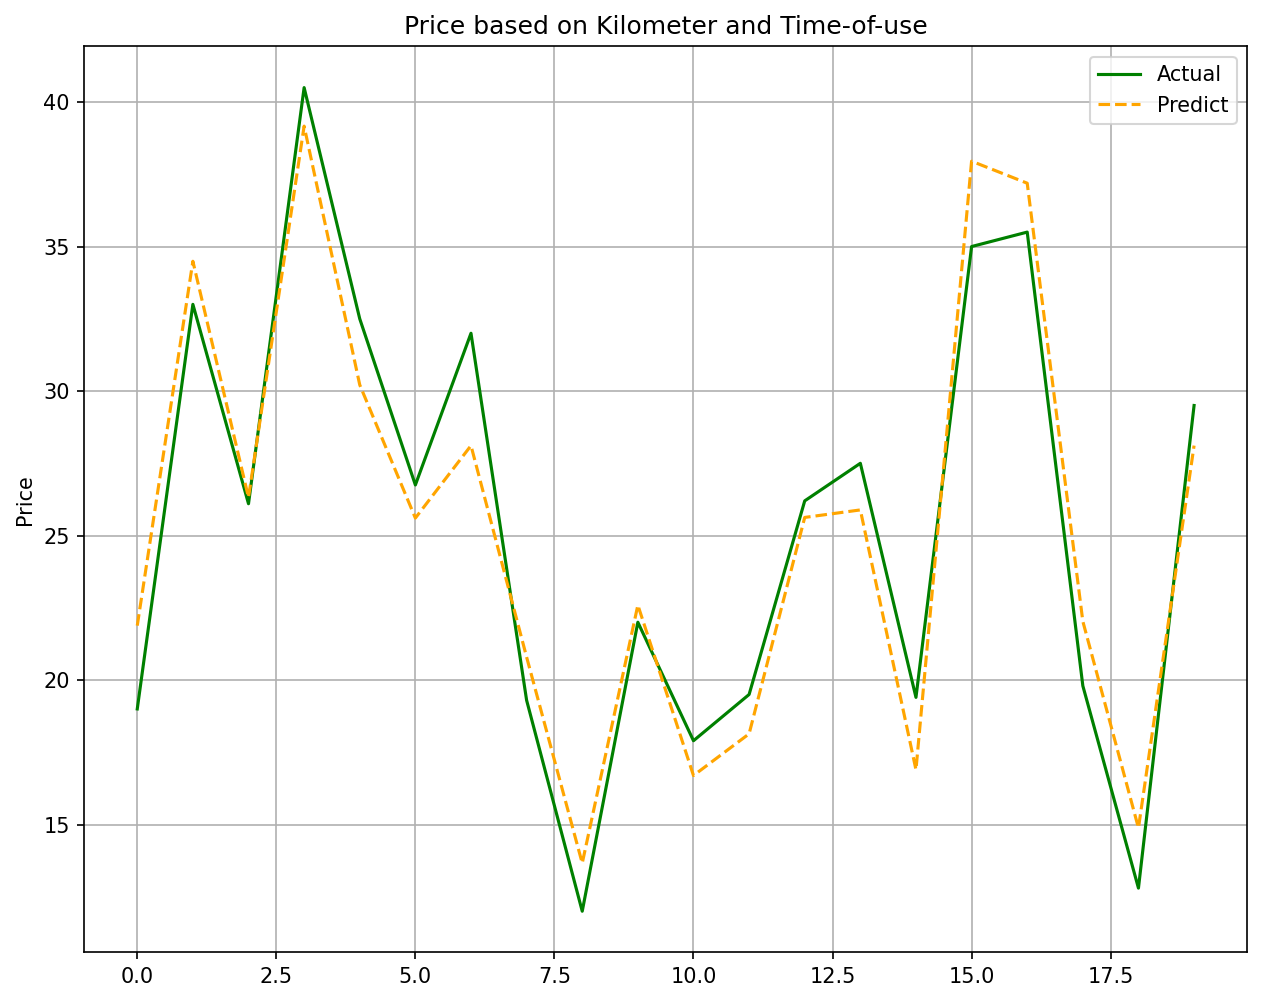

[23.043084   32.02740813]


In [60]:
# First exercise
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df = pd.read_json('Prices_of_Cars.json')
print(df)
x = df[['So_Km(1000Km)','Nam_Su_Dung']]
y = df['Gia_Xe(1000$)']

plt.scatter(df['Nam_Su_Dung'],df['Gia_Xe(1000$)'])
plt.title('Relationship between Time-of-use and Price')
plt.xlabel('Nam_Su_Dung')
plt.ylabel('Gia_Xe(1000$)')
plt.show()

plt.scatter(df['So_Km(1000Km)'],df['Gia_Xe(1000$)'])
plt.title('Relationship between Kilometer and Price')
plt.xlabel('So_Km(1000Km)')
plt.ylabel('Gia_Xe(1000$)')
plt.show()
plt.clf()

sns.heatmap(df.corr(), annot=True, data=df, linewidths=.7, linecolor='white', cmap='RdYlGn_r')
plt.show()
plt.clf()

x_ = np.array(x)
y_ = np.array(y)
x_ = sm.add_constant(x_)
model = sm.OLS(y_, x_).fit()
print(model.summary())

# Visualize
yhat = model.predict(x_)
plt.plot(y, color='green', label='Actual')
plt.plot(yhat, color='orange', label='Predict', linestyle='--') 
plt.ylabel('Price')
plt.title('Price based on Kilometer and Time-of-use')
plt.legend()
plt.grid()
plt.show()

# Predict value
new_x = np.array([[105, 7],[67.6, 3]])
new_x = sm.add_constant(new_x)
pre_y = model.predict(new_x)
print(pre_y)

In [79]:
# Second exercise
import json
import csv
def convert_txt_to_csv(source_file, destination_file):
    f1 = open(source_file, 'r', encoding='utf-8')
    data = []
    for line in f1:
        data.append(line.split())
    f1.close()
    f2 = open(destination_file, 'a', encoding='utf-8')
    w = csv.writer(f2, delimiter=',', quotechar='"')
    for item in data:
        w.writerow(item)

convert_txt_to_csv('Ads.txt', 'Ads.csv')
df = pd.read_csv('Ads.csv')
print(df)

      Id youtube facebook newspaper  sales
0      1  271.36    44.36     82.11  27.68
1      2   55.40    46.22     53.12  13.52
2      3   22.64    54.09     82.16  12.16
3      4  181.80    49.56     70.20  22.20
4      5  216.96    12.96     70.08  15.48
..   ...     ...      ...       ...    ...
384  191   45.84     4.44     16.56   9.12
385  192  113.04     5.88      9.72  11.64
386  193  212.40    11.16      7.68  15.36
387  194  340.32    50.40     79.44  30.60
388  195  278.52    10.32     10.44  16.08

[389 rows x 5 columns]


In [81]:
# Convert csv to json
def convert_csv_to_json(csvFilePath, jsonFilePath):
    json_array = []
    csvf = open(csvFilePath, encoding='utf-8')
    r = csv.DictReader(csvf)
    for row in r:
        json_array.append(row)
    jsonf = open(jsonFilePath, 'a', encoding='utf-8')
    s = json.dumps(json_array, indent=4)
    jsonf.write(s)

convert_csv_to_json('Ads.csv', 'Ads.json')

## DECISION TREE

       Age  Income Student Credit_rating Buys_computer
0     <=30    high      no          fair            no
1     <=30    high      no     excellent            no
2   31..40    high      no          fair           yes
3      >40  medium      no          fair           yes
4      >40     low     yes          fair           yes
5      >40     low     yes     excellent            no
6   31..40     low     yes     excellent           yes
7     <=30  medium      no          fair            no
8     <=30     low     yes          fair           yes
9      >40  medium     yes          fair           yes
10    <=30  medium     yes     excellent           yes
11  31..40  medium      no     excellent           yes
12  31..40    high     yes          fair           yes
13     >40  medium      no     excellent            no
       Age  Income Student Credit_rating
0     <=30    high      no          fair
1     <=30    high      no     excellent
2   31..40    high      no          fair
3      >40 

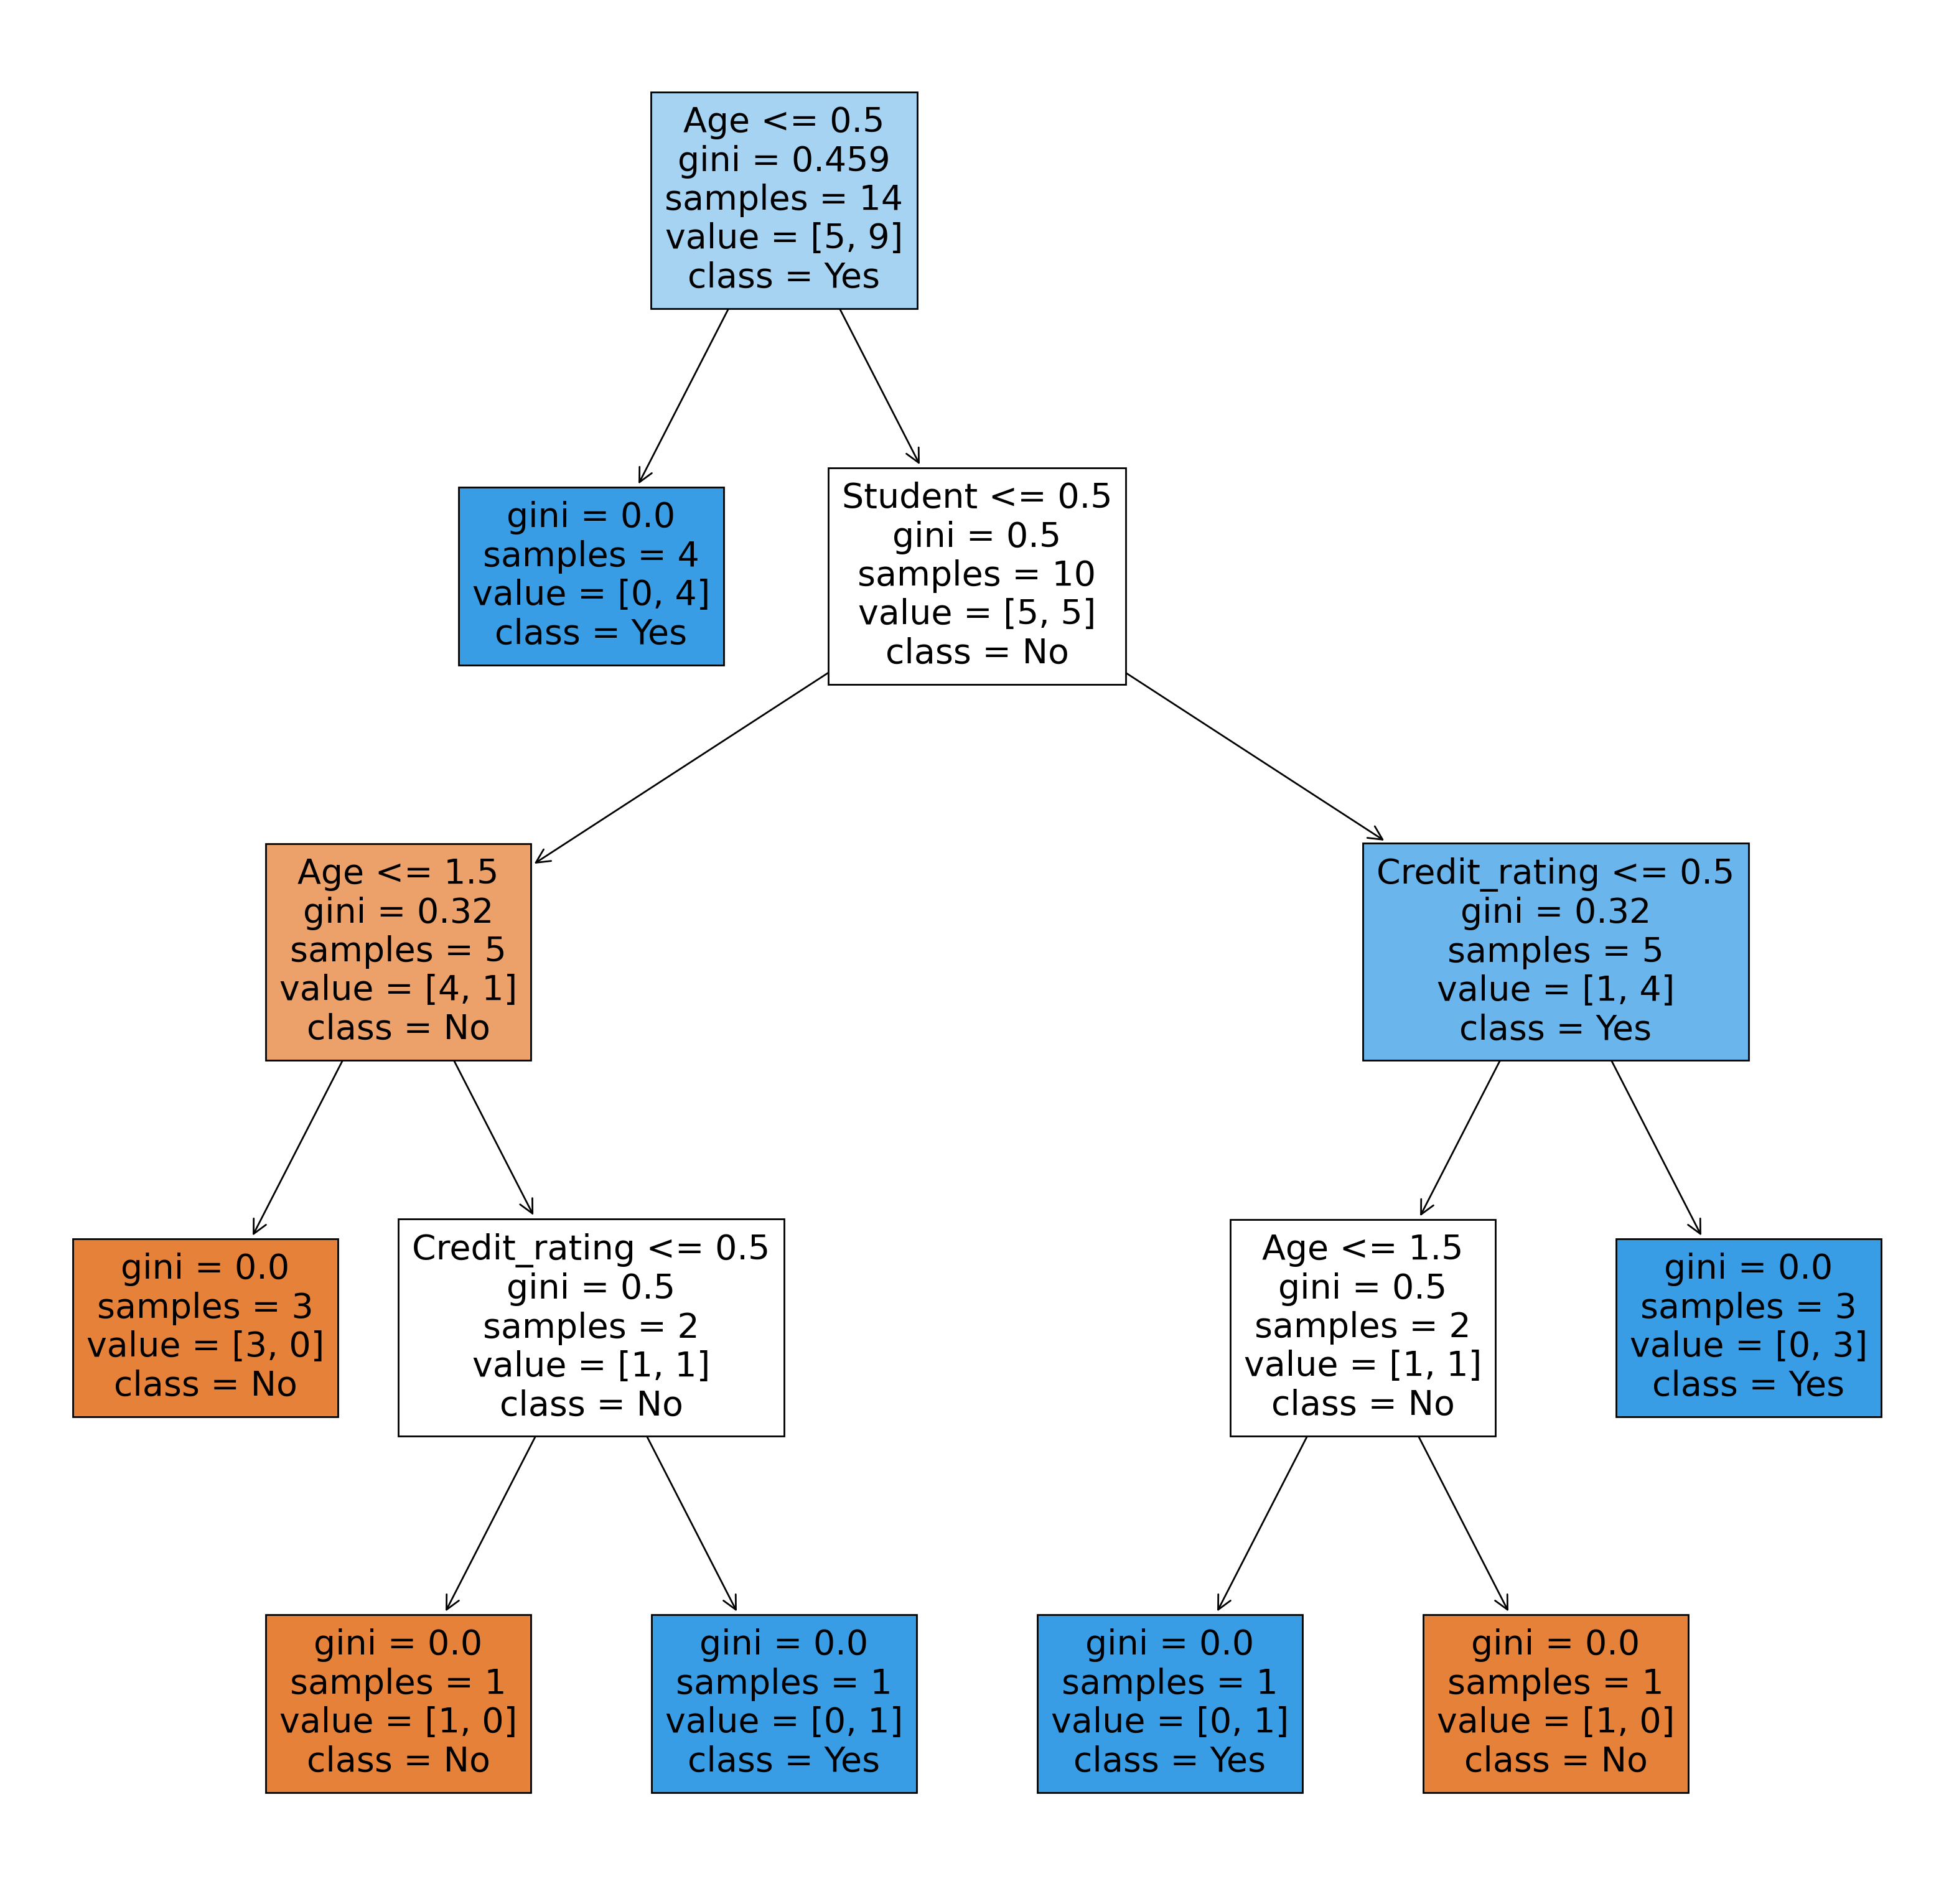

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./Data/BuyComputer.csv')
print(df)
x = df.drop(['Buys_computer'], axis='columns') # Bỏ cột cuối
print(x)
y = df['Buys_computer'] # Nếu cột cần tính là biến liên tục thì chia theo khoảng để rời rạc hóa biến

# Cách 1: khai báo thủ công miền giá trị
d = {'x <= 30': 0, '31..40': 1, '> 40': 2}
df['Age'] = df['Age'].map(d)

# Cách 2: dùng thư viện
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

x['Age_e'] = LabelEncoder().fit_transform(x['Age']) # Age_encoder
x['Income_e'] = LabelEncoder().fit_transform(x['Income'])
x['Student_e'] = LabelEncoder().fit_transform(x['Student'])
x['Credit_rating_e'] = LabelEncoder().fit_transform(x['Credit_rating'])
print(x)
x_e = x.drop(['Age', 'Income', 'Student', 'Credit_rating'], axis='columns')
y_e = LabelEncoder().fit_transform(y)

model = DecisionTreeClassifier(criterion='gini', random_state=10).fit(x_e, y_e)
sc = model.score(x_e, y_e)
print(sc)
features = ['Age', 'Income', 'Student', 'Credit_rating']
text_representation = tree.export_text(model, feature_names=features)
print(text_representation)

plt.figure(figsize=(20, 20), dpi=200)

t = tree.plot_tree(model, feature_names=features, class_names=['No', 'Yes'], filled=True)
# => 31..40 đc gắn tự động với 0, <= 30 được gắn với 1, >= 40 gắn với 2
pre_val = model.predict([[1, 0, 0, 1]]) # tuổi dưới 30, thu nhập cao, không phải sinh viên, tín dụng trung bình
print(pre_val)

## ARIMA FORECASTING MODEL

            MinTemp  MaxTemp  AvgTemp  Sunrise  Sunset
DATE                                                  
2014-01-01     33.0     46.0     40.0      657    1756
2014-01-02     35.0     50.0     43.0      657    1756
2014-01-03     36.0     45.0     41.0      657    1757
2014-01-04     32.0     41.0     37.0      658    1757
2014-01-05     24.0     38.0     31.0      658    1758
...             ...      ...      ...      ...     ...
2018-12-26     35.0     45.0     40.0      654    1752
2018-12-27     33.0     44.0     39.0      655    1752
2018-12-28     33.0     47.0     40.0      655    1753
2018-12-29     36.0     47.0     42.0      655    1753
2018-12-30     39.0     52.0     46.0      656    1754

[1825 rows x 5 columns]
MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64
            MinTemp  MaxTemp  AvgTemp  Sunrise  Sunset
DATE                                                  
2014-01-01     33.0     46.0     40.0      657    1756
2014-01-02     35

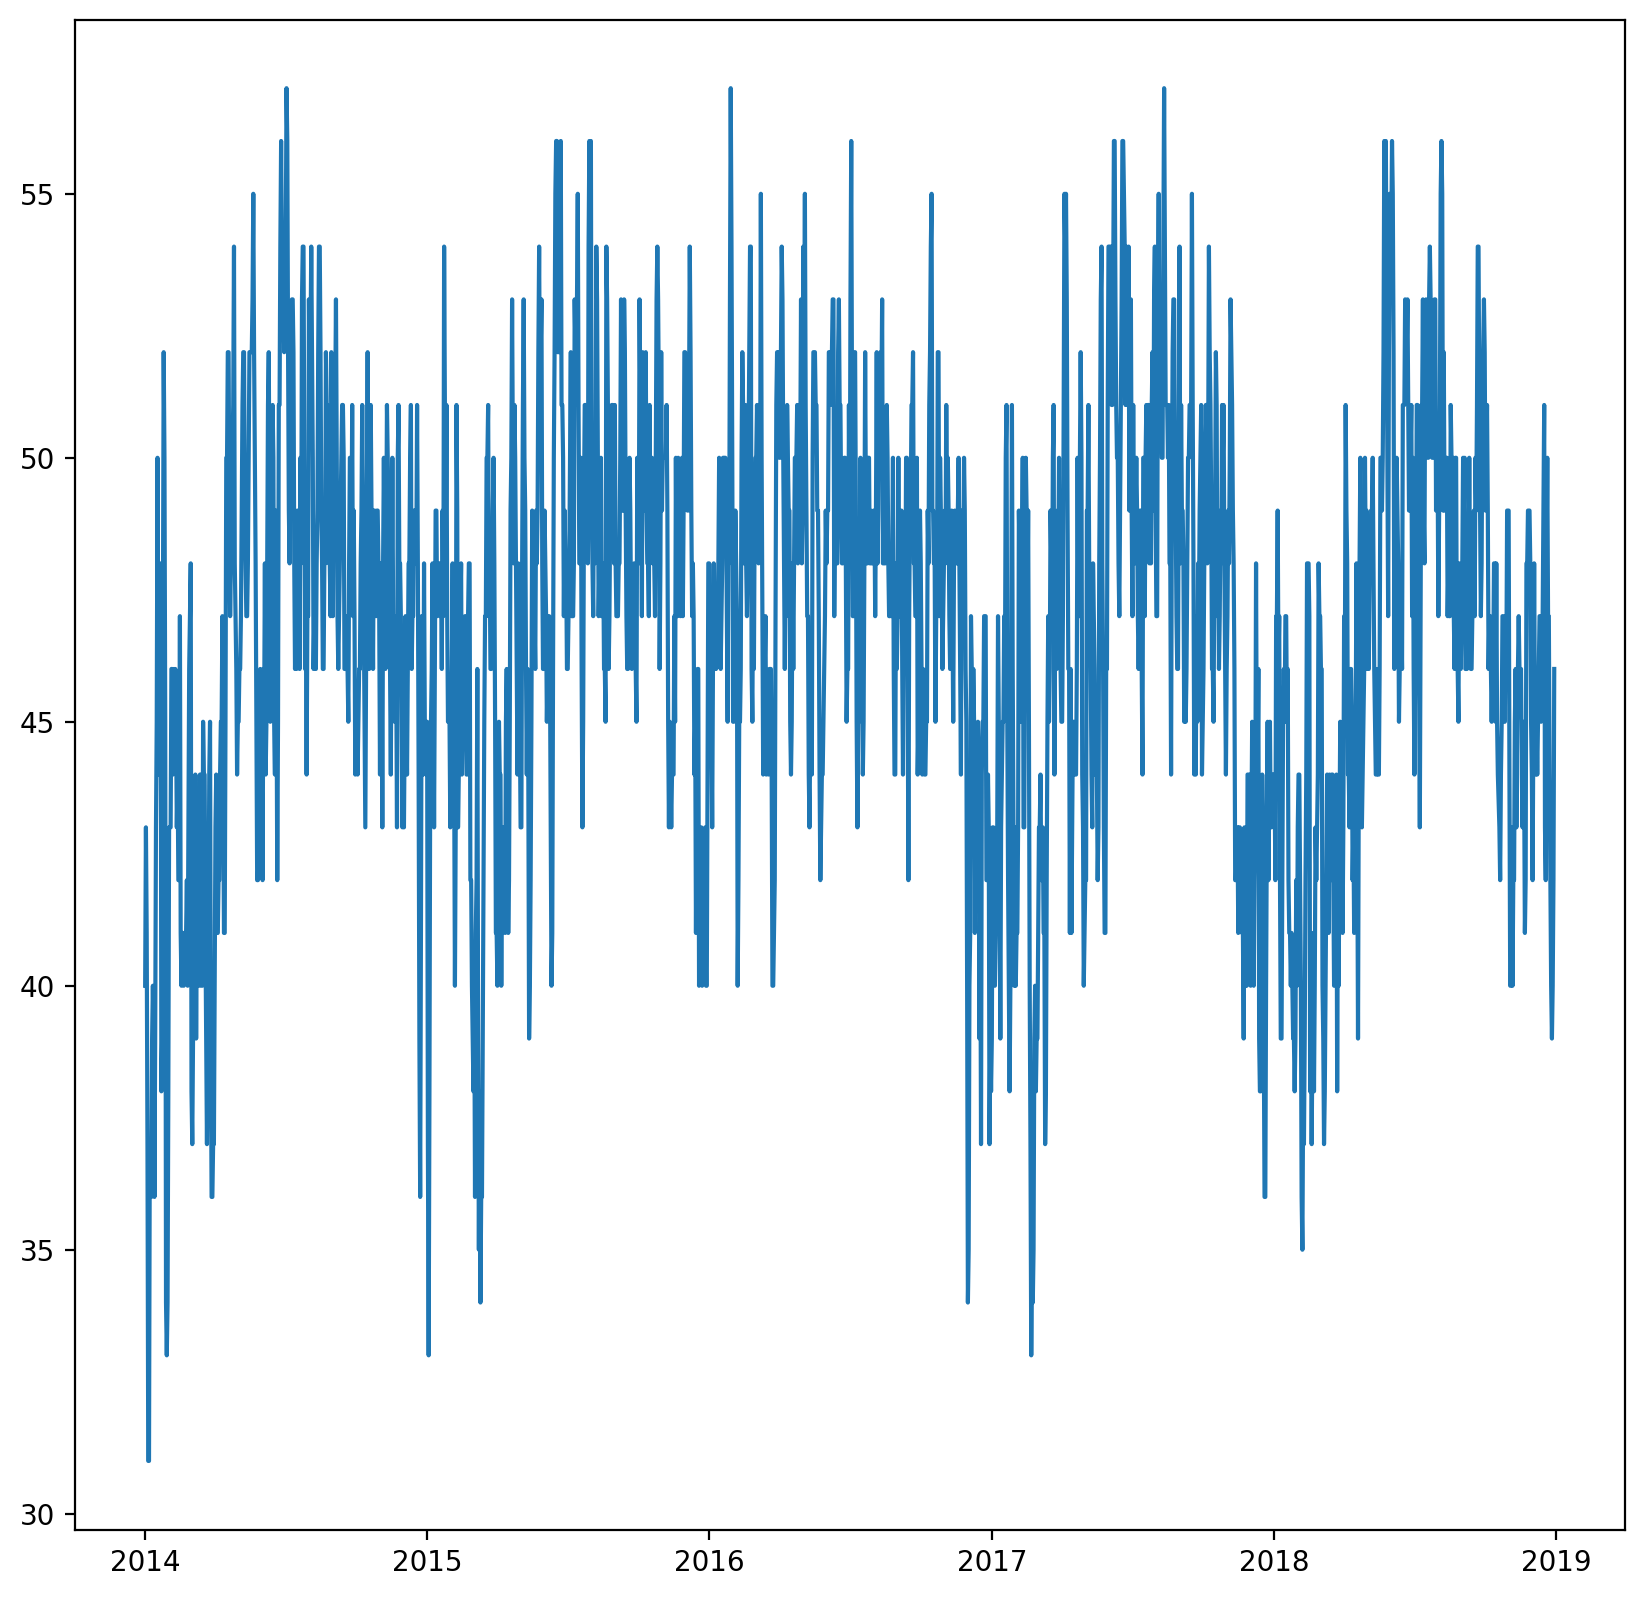

ADF Test:              -6.554680e+00
p_value                 8.675937e-09
lags                    1.200000e+01
observation             1.808000e+03
Critical value (1%)    -3.433972e+00
Critical value (5%)    -2.863140e+00
Critical value (10%)   -2.567622e+00
dtype: float64
KPSS Test:                0.171508
p_value                   0.100000
lags                     25.000000
Critical value (10%)      0.347000
Critical value (5%)       0.463000
Critical value (2.5%)     0.574000
Critical value (1%)       0.739000
dtype: float64
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.736, Time=9.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.43 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=8.27 sec
 ARIMA(2,0,1)(0,0,0)[0] i

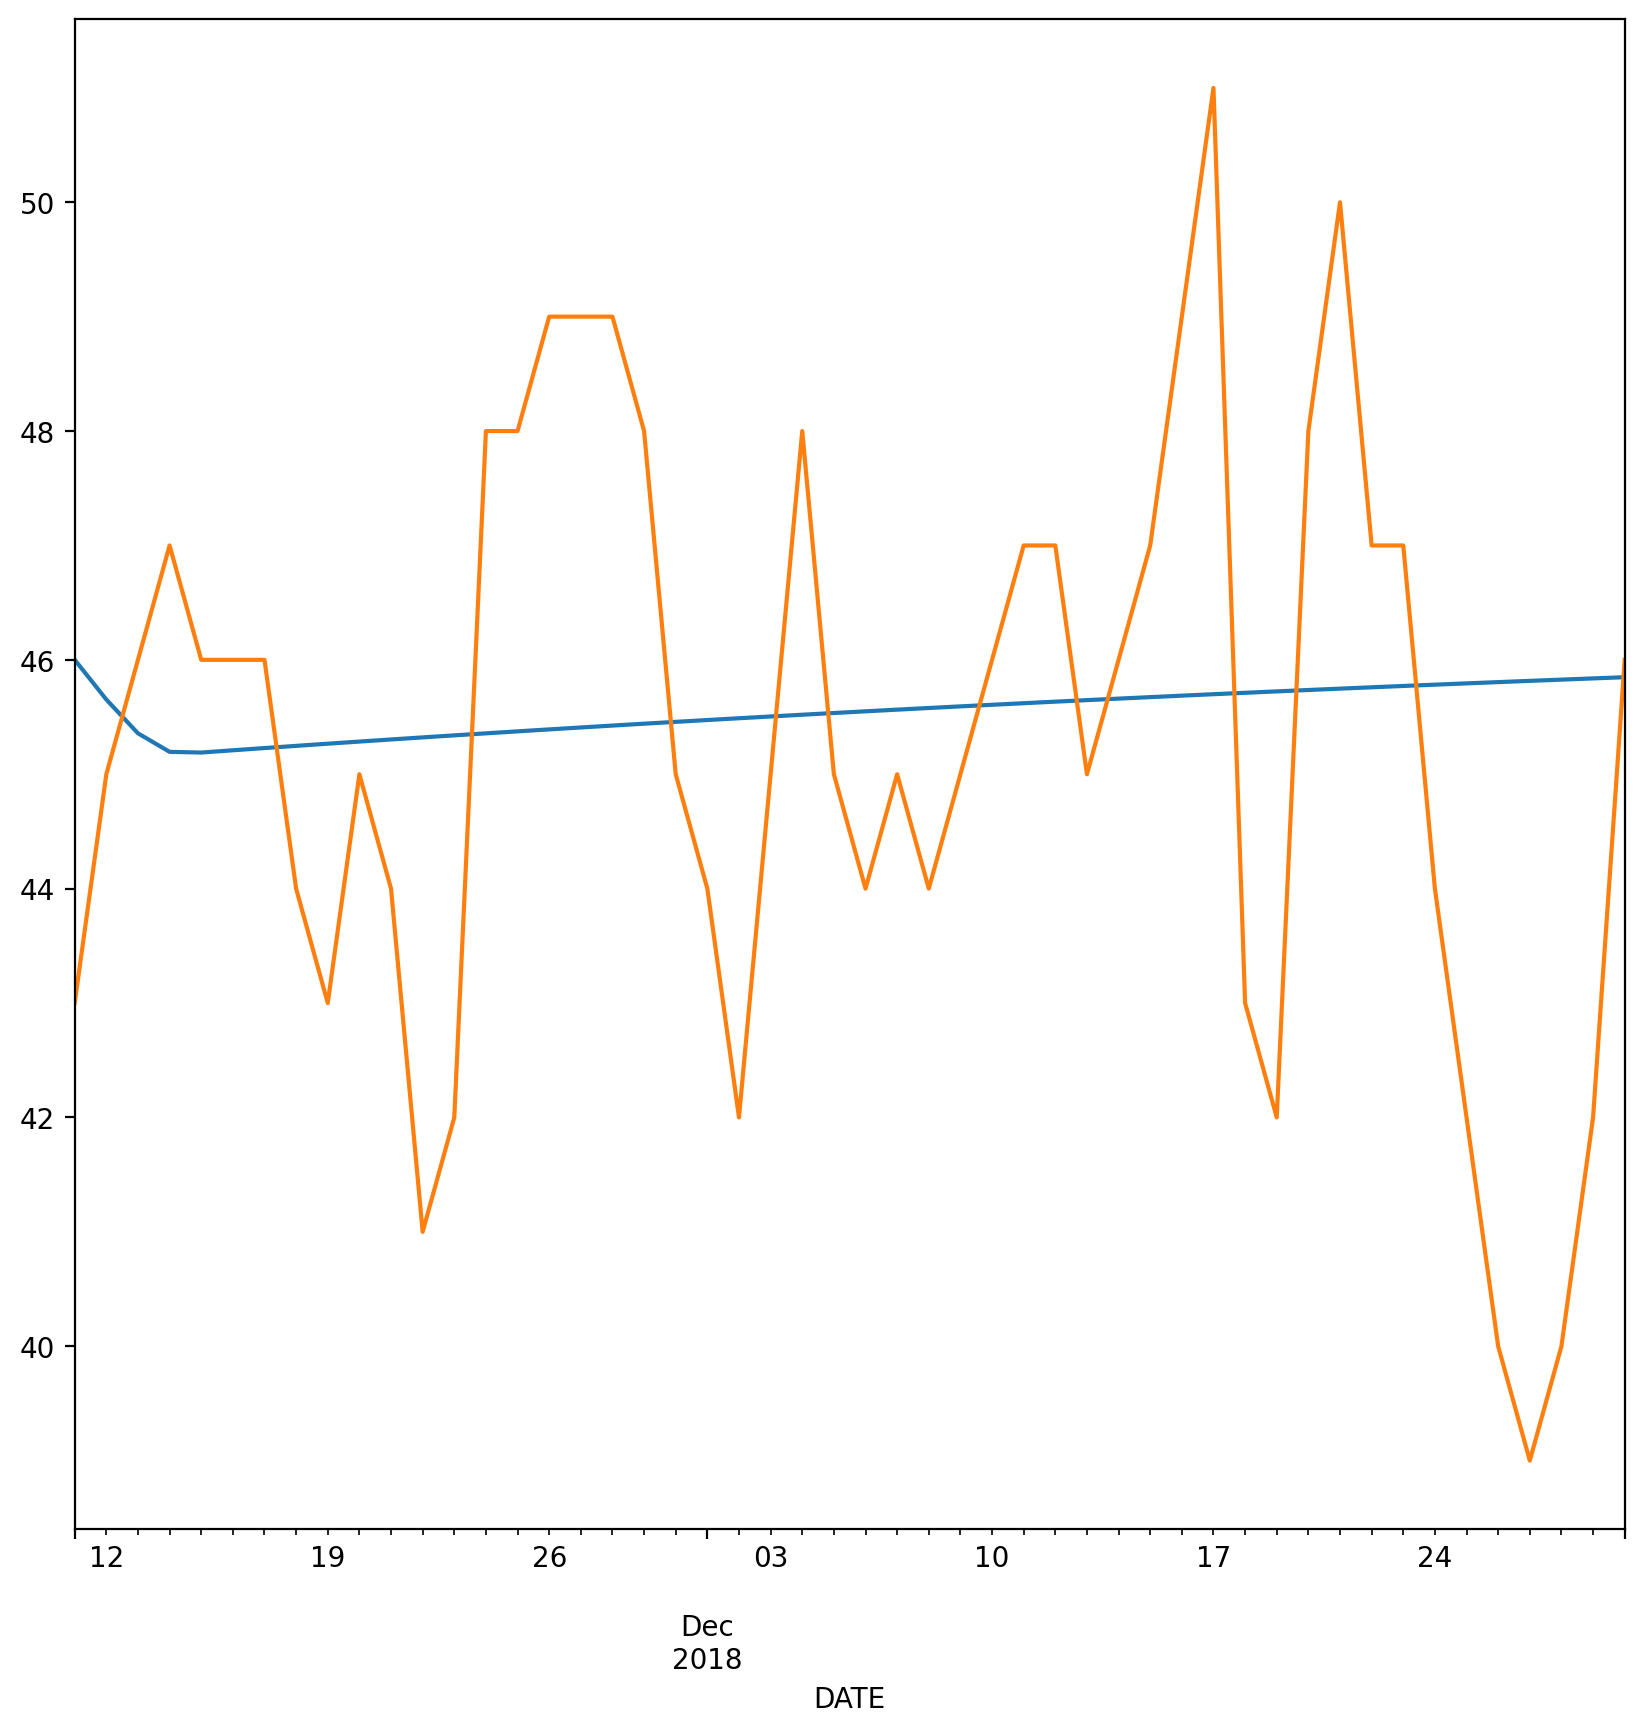

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
from math import *
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
warnings.filterwarnings('ignore')

def adf_test(x):
    indices = ['ADF Test: ', 'p_value', 'lags', 'observation']
    test = adfuller(x, autolag='AIC')
    result = pd.Series(test[:4], index=indices)
    for key, value in test[4].items():
        result[f'Critical value ({key})'] = value
    return result

df = pd.read_csv('./Data/DailyTemps.csv', index_col='DATE', parse_dates=True)
print(df)
print(df.isnull().sum()) # Thấy các cột MinTemp, MaxTemp, AvgTemp có dữ liệu rỗng
df = df.dropna(axis=0) # Xóa dòng có phần tử rỗng, axis=0 nếu k ghi cũng được mặc định là xóa dòng, axis=1 là xóa cột
print(df)

# Visualize
plt.plot(df['AvgTemp'])
plt.show()
print(adf_test(df['AvgTemp']))

# Function kiểm định KPSS
def kpss_test(x):
    indices = ['KPSS Test: ', 'p_value', 'lags']
    test = kpss(x)
    result = pd.Series(test[:3], index=indices)
    for key, value in test[3].items():
        result[f'Critical value ({key})'] = value
    return result
print(kpss_test(df['AvgTemp'])) # Dữ liệu có tính dừng

# Finding p, q
from pmdarima import auto_arima
steps = auto_arima(df['AvgTemp'], trace=True, suppress_warnings=True)
print(steps)
train = df.iloc[: -50]
test = df.iloc[-50:]

# Create ARIMA model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train['AvgTemp'], order=(1, 0, 5))
model_fitted = model.fit()
model_fitted.summary()

# Prediction
predict_values = model_fitted.predict(start=len(train), end=len(df) - 1)
predict_values.index = df.index[len(train):len(df)]
predict_values.plot()
test['AvgTemp'].plot()

# Train ARIMA model with all dataset
model_all = ARIMA(df['AvgTemp'], order=(1, 0, 5)).fit()

# Predict for future values
index_future_dates = pd.date_range(start='2018-12-30', end='2019-01-29')
predict_future_values = model_all.predict(start=len(df), end=len(df) + 30)
print(predict_future_values)

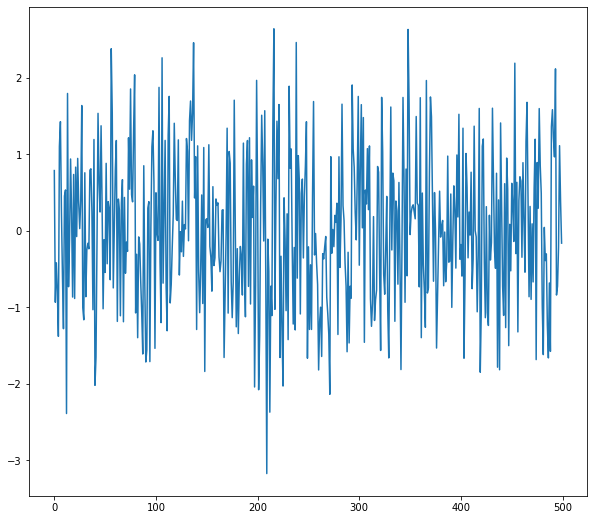

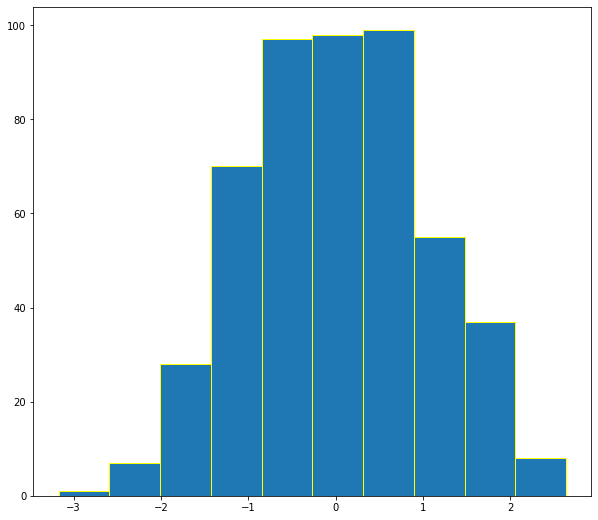

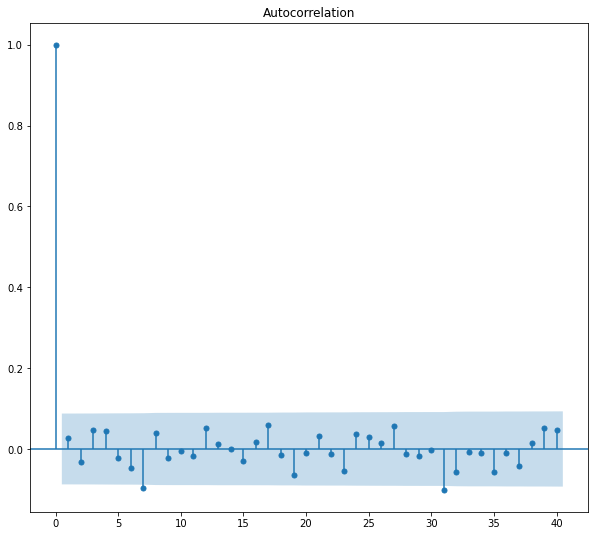

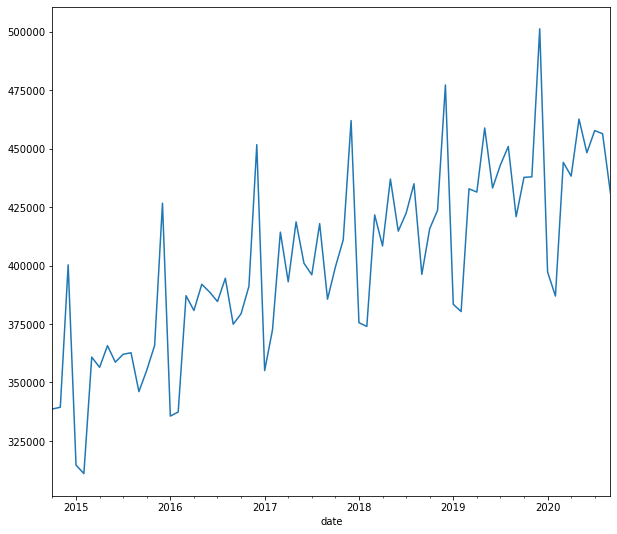

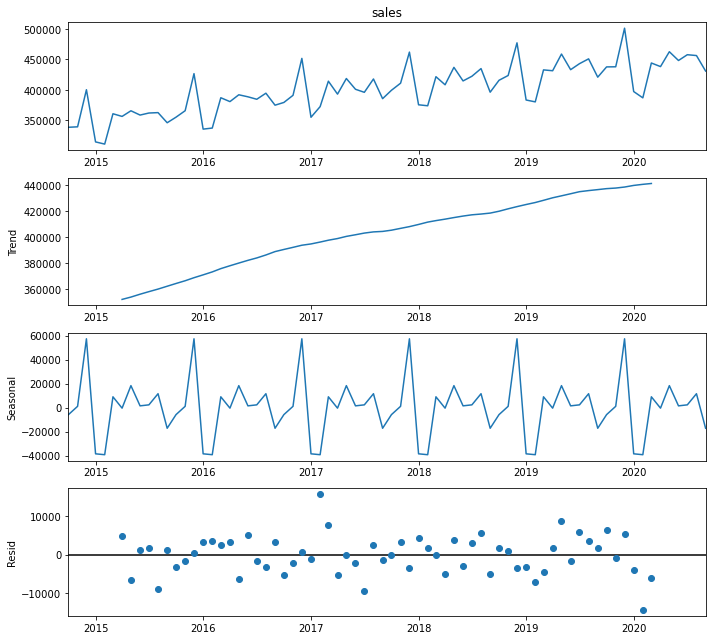

ADF Test:               -4.344563
p_value                  0.000372
lags                    11.000000
observation             60.000000
Critical value (1%)     -3.544369
Critical value (5%)     -2.911073
Critical value (10%)    -2.593190
dtype: float64


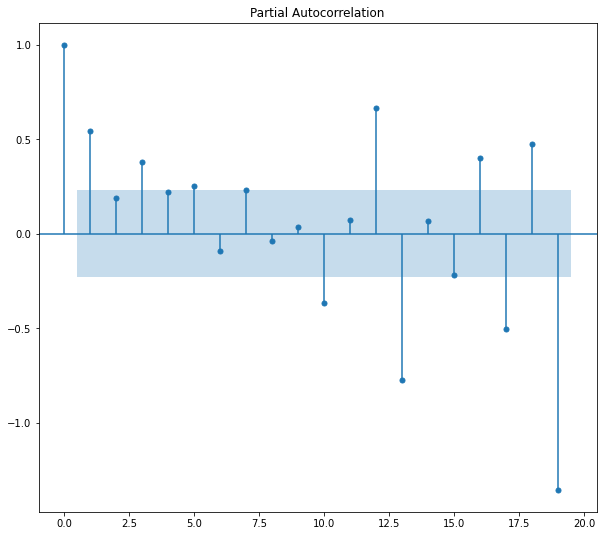

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   62
Model:                    AutoReg(11)   Log Likelihood                -570.984
Method:               Conditional MLE   S.D. of innovations          17620.559
Date:                Sun, 05 Sep 2021   AIC                             20.063
Time:                        14:17:33   BIC                             20.556
Sample:                            11   HQIC                            20.252
                                   62                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.406e+04   4.52e+04      0.311      0.756   -7.45e+04    1.03e+05
y.L1          -0.3132      0.131     -2.391      0.017      -0.570      -0.056
y.L2          -0.2831      0.130     -2.185      0.0

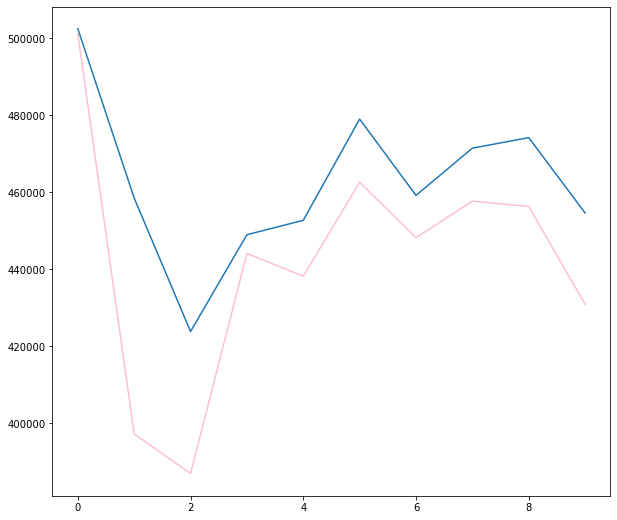

0.28996409296524306
26107.473256470814


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

data = np.random.normal(0, 1, 500)
plt.plot(data)
plt.show()
plt.clf()
plt.hist(data, edgecolor='yellow')
plt.show()
plot_acf(data, lags=40)
plt.show()

#%% - Các bước kiểm định ADF kiểm tra tính dừng của mô hình ARMA
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf

#%% Load data
df = pd.read_csv('./Data/RetailSales.csv', index_col=0, parse_dates=True)
df['sales'].plot()
plt.show()

#%% Decompose dataset
dec = seasonal_decompose(df['sales'])
dec.plot()
plt.show()

#%% - Check stationary using ADF
from math import *
def sigmoid(x):
    return 1 / (1 + exp(-x))
from statsmodels.tsa.stattools import adfuller, kpss
def adf_test(x):
    indices = ['ADF Test: ', 'p_value', 'lags', 'observation']
    test = adfuller(x, autolag='AIC')
    result = pd.Series(test[:4], index=indices)
    for key, value in test[4].items():
        result[f'Critical value ({key})'] = value
    return result
print(adf_test(df['sales']))

#%% - Check correlation
pacf = plot_pacf(df['sales'])
plt.show()

#%% - Split dataset
train = np.array(df['sales'][:len(df['sales']) - 10])
test = np.array(df['sales'][len(df['sales']) - 10:])
from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')
model = AutoReg(train, lags=11).fit()
print(model.summary())

#%% - Predict on test dataset
predict_values = model.predict(start=len(train), end=len(df['sales']) - 1, dynamic=False)
plt.plot(predict_values)
plt.plot(test, color='pink')
plt.show()

#%% - Calculate error
from sklearn.metrics import r2_score, mean_squared_error
from math import * 
R_square = r2_score(test, predict_values)
rmse = sqrt(mean_squared_error(test, predict_values))
print(R_square)
print(rmse)

## LOGISTIC REGRESSION

    age  bought_insurance
0    22                 0
1    25                 0
2    47                 1
3    52                 0
4    46                 1
5    56                 1
6    55                 0
7    60                 1
8    62                 1
9    61                 1
10   18                 0
11   28                 0
12   27                 0
13   29                 0
14   49                 1
15   55                 1
16   25                 1
17   58                 1
18   19                 0
19   18                 0
20   21                 0
21   26                 0
22   40                 1
23   45                 1
24   50                 1
25   54                 1
26   23                 0


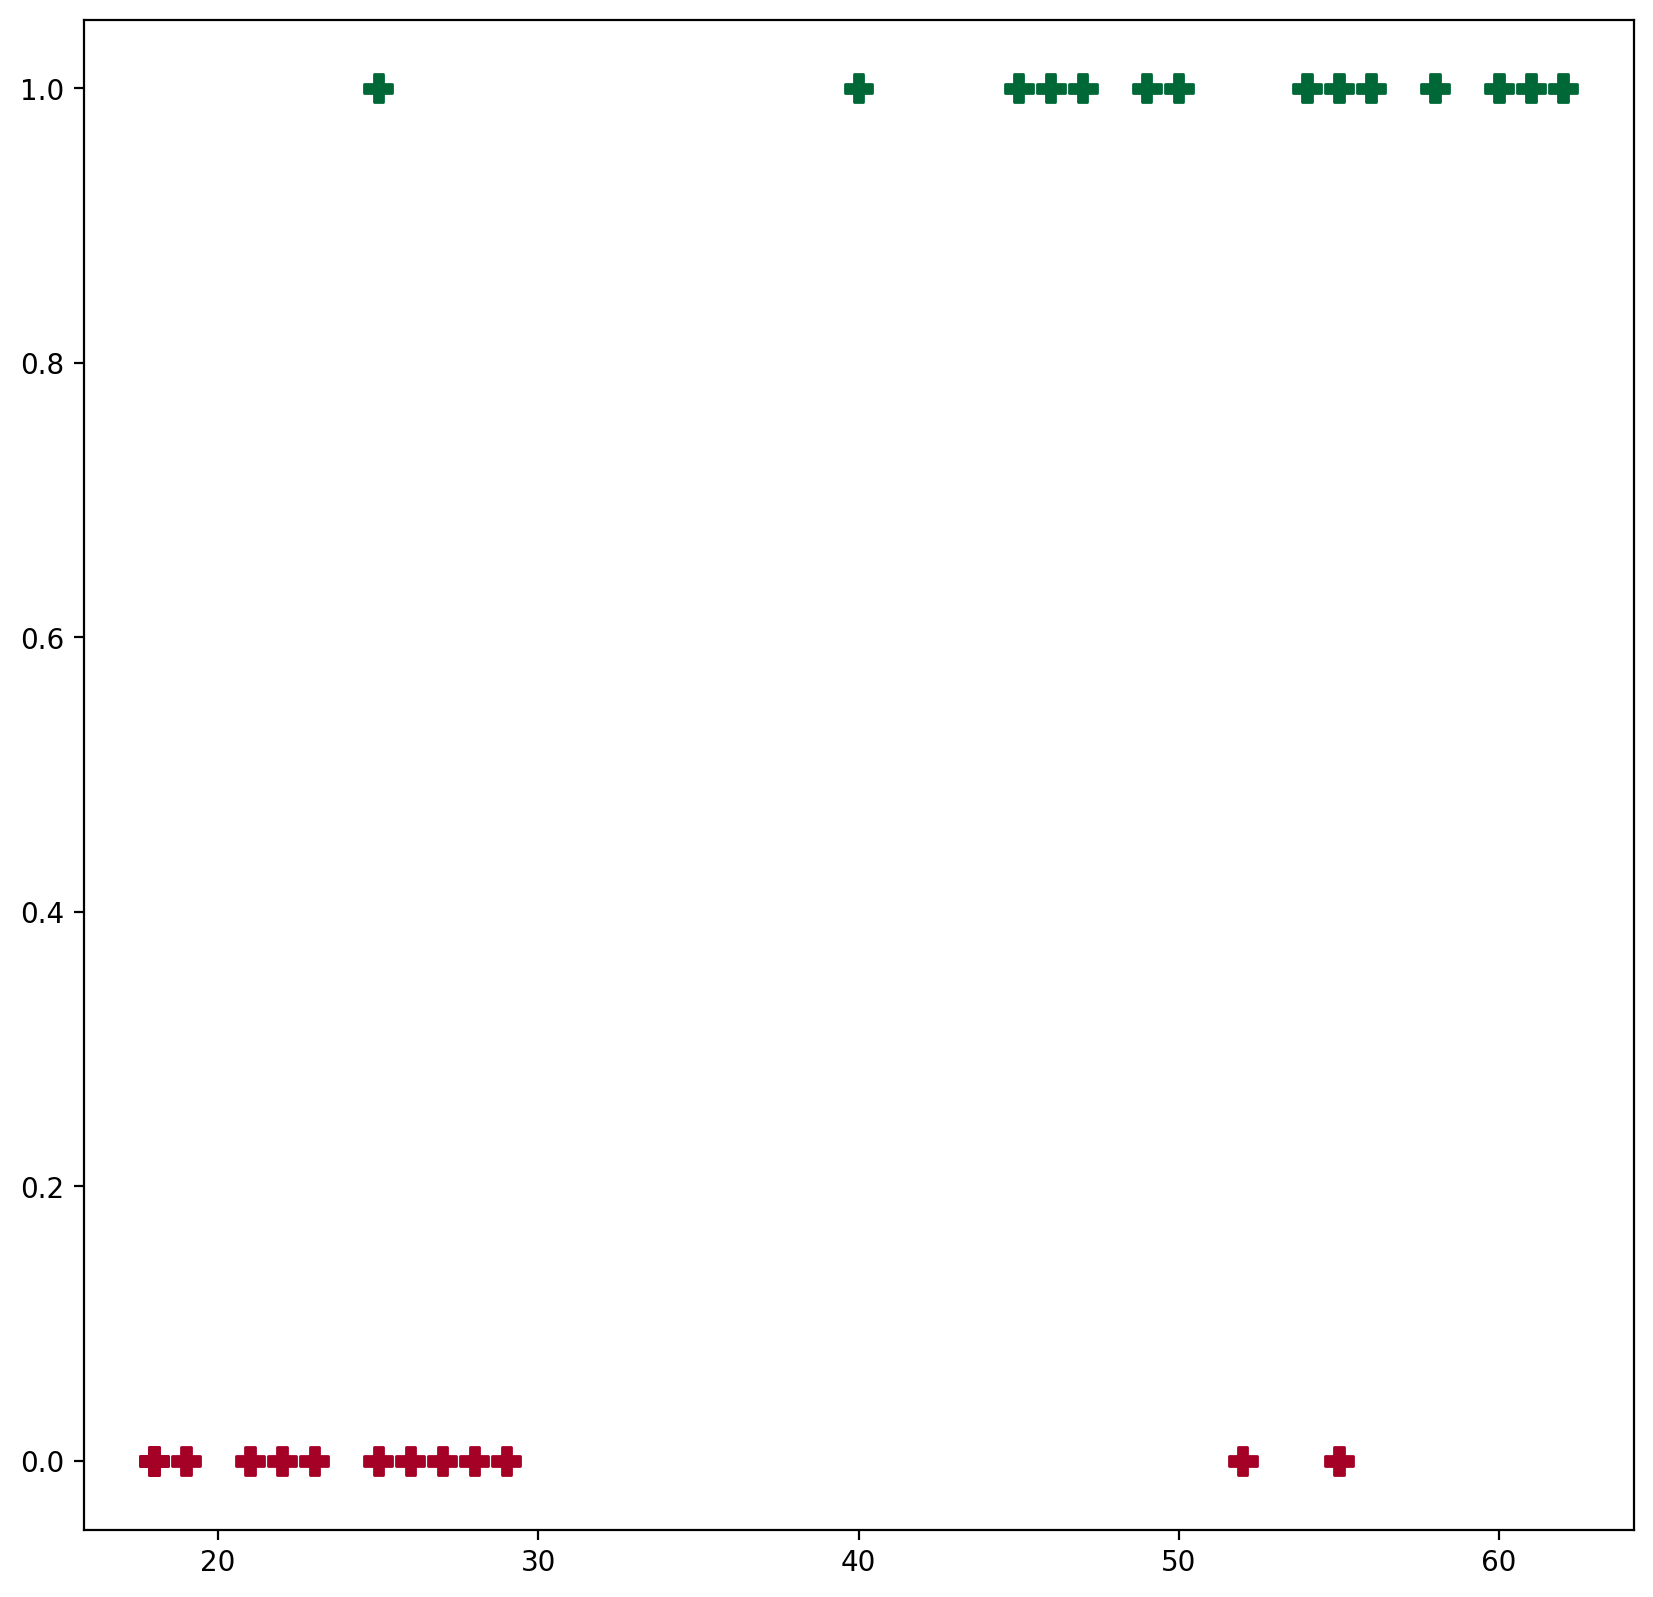

ValueError: Found input variables with inconsistent numbers of samples: [24, 3]

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('./Data/Logistic_Exercise.csv')
print(df)
plt.scatter(df.age, df.bought_insurance, cmap='RdYlGn', c=df.bought_insurance, alpha=3, s=100, marker='P')
plt.show()
# df.age là series
from sklearn.model_selection import train_test_split
X_train, y_train, x_test, y_test = train_test_split(df[['age']], df[['bought_insurance']], test_size=0.1)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)
intercept = model.intercept_
coefs = model.coef_
Rsqrt = model.score(X_test, y_test)
print(intercept, coefs, Rsqrt)
prob_matrix = model.predict_proba(X_train)
from sklearn_metrics import classification_report, confusion_matrix
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred)) # Tính precision, recall, F1-score, ...
cm = confusion_matrix(y_train, y_pred)
plt.scatter(X_train, y_train, color='green', marker='o', label='Actual')
plt.scatter(X_train, y_train, color='orange', marker='o', label='Predict')
plt.legend()
plt.show()
fig, axis = plt.subplots()
axis.imshow(cm)
axis.xaxis.set(ticks=(0,1), ticklabels='Predicted 0s', 'Predicted 1s')
axis.yaxis.set(ticks=(0,1), ticklabels='Actual 0s', 'Actual 1s')
for i in range(2):
    for j in range(2):
        axis.text(j, i, cm[i, j], ha='center', va='center', color='#FFFFFFF', fontsize=30)
plt.show()
pred_value = model.predict(X_test)
pred_score = model_score(X_test, y_test)
from math import *
def sigmoid(f, x):
    return f(x) = 1 / (1 + exp(-x))


## SIMPLE LINEAR REGRESSION

56.4
55.0
27.071017712675676
732.8400000000001
83.25
0.7518083182640146 0.6207052441229646 0.9914164765282287 7.132575392618939e-13 0.027497497152726553


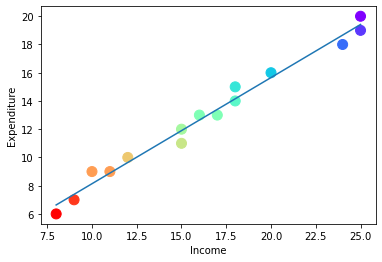

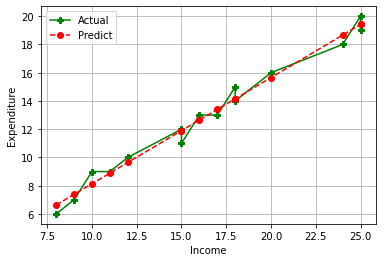

In [34]:
# C1: Define function, không import function có sẵn
# Descriptive Statistics
import numpy as np
dat = [54, 23, 56, 87, 93, 88, 72, 13, 29, 49]
print(np.mean(dat))
print(np.median(dat))
print(np.std(dat))
print(np.var(dat))
print(np.percentile(dat, 75)) # 75% dữ liệu có giá trị nhỏ hơn 83.25
from scipy import stats
income = [8, 9, 10, 11, 12, 15, 15, 16, 17, 18, 18, 20, 24, 25, 25]
expenditure = [6, 7, 9, 9, 10, 12, 11, 13, 13, 15, 14, 16, 18, 20, 19]
slope, intercept, rvalue, pvalue, stderr = stats.linregress(income, expenditure)
print(slope, intercept, rvalue, pvalue, stderr)
# Create model
def func(x):
    return intercept + slope * x
model = list(map(func, income))
# Visual
import matplotlib.pyplot as plt
plt.scatter(income, expenditure, alpha=3, s=100, cmap='rainbow_r', c=expenditure) # Màu loang bằng kết hợp c và cmap
plt.xlabel('Income')
plt.ylabel('Expenditure')
plt.plot(income, model)
plt.show()
# Predict
pre_val = []
for i in income:
    pre_val.append(func(i))
plt.plot(income, expenditure, color='green', label='Actual', marker='P')
plt.plot(income, pre_val, color='r', label='Predict', linestyle='--', marker='o')
plt.xlabel('Income')
plt.ylabel('Expenditure')
plt.grid()
plt.legend()
plt.show()

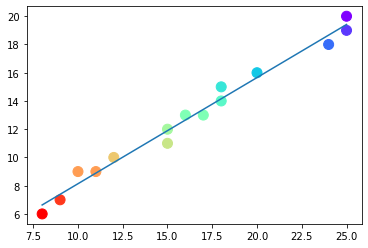

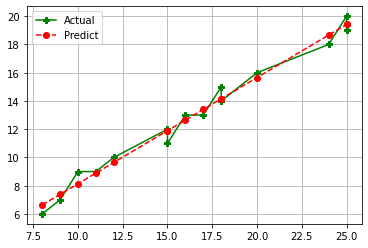

In [33]:
# C2: Dùng Linear Regression trong sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Load data
income = np.array([8, 9, 10, 11, 12, 15, 15, 16, 17, 18, 18, 20, 24, 25, 25]).reshape((-1, 1))
expenditure = np.array([6, 7, 9, 9, 10, 12, 11, 13, 13, 15, 14, 16, 18, 20, 19])
# Create model
model = LinearRegression().fit(income, expenditure)
# Get results of attributes, including coef_, rank_, singular_, intercept_. Riêng score không phải là attribute
R_square = model.score(income, expenditure)
intercept = model.intercept_
slope = model.coef_
# Visual 
plt.plot(income, intercept + slope * income)
plt.scatter(income, expenditure, cmap='rainbow_r', c=expenditure, s=100, alpha=3)
plt.show()
# Predict for values
pre_val = intercept + slope * income
plt.plot(income, expenditure, color='green', label='Actual', marker='P')
plt.plot(income, pre_val, color='r', label='Predict', linestyle='--', marker='o')
plt.grid()
plt.legend()
plt.show()

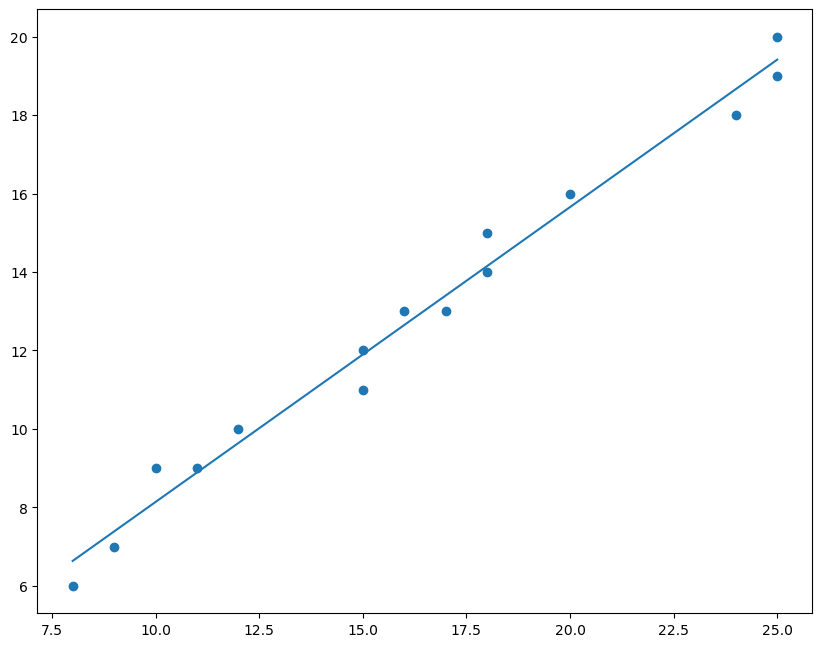

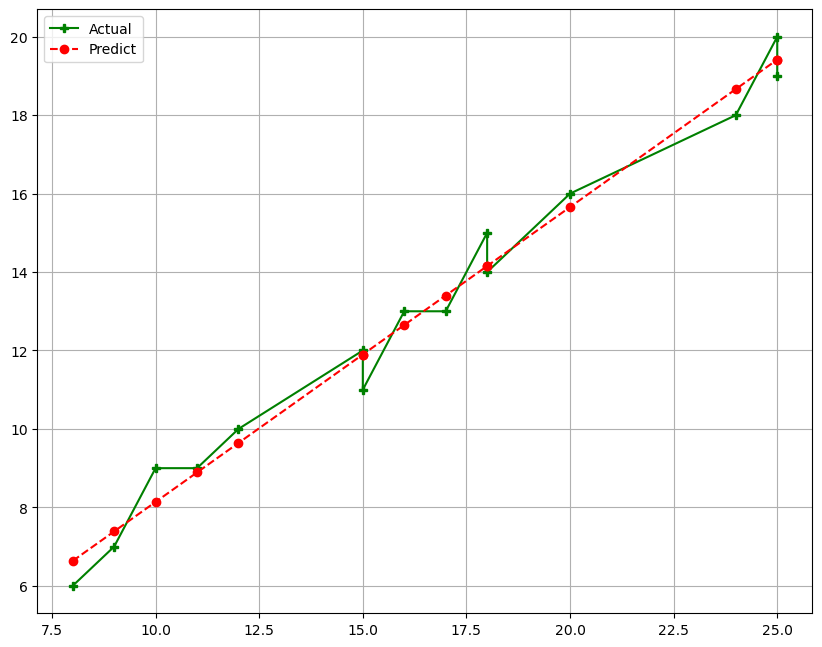

In [57]:
# Áp dụng cách 2 vào file dataset có sẵn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_csv('./Data/Income.csv')
x = df[['Income']] # x phải là DataFrame hoặc 2D-array do dùng sklearn
y = df[['Expenditure']]
model = LinearRegression().fit(x, y)
R_square = model.score(x, y)
intercept = model.intercept_
slope = model.coef_
# Visualize
plt.scatter(x, y) # Không ghi c=y được vì y là DataFrame
plt.plot(x, intercept + slope * x)
plt.show()
# Dùng function predict thay vì ghi intercept + slope * x 
pre_val = model.predict(x)
# pre_val = intercept + slope*x
plt.plot(income, expenditure, color='green', label='Actual', marker='P')
plt.plot(income, pre_val, color='r', label='Predict', linestyle='--', marker='o')
plt.legend()
plt.grid()
plt.show()

          Income  Expenditure
count  15.000000    15.000000
mean   16.200000    12.800000
std     5.621388     4.262796
min     8.000000     6.000000
25%    11.500000     9.500000
50%    16.000000    13.000000
75%    19.000000    15.500000
max    25.000000    20.000000
0      8
1      9
2     10
3     11
4     12
5     15
6     15
7     16
8     17
9     18
10    18
11    20
12    24
13    25
14    25
Name: Income, dtype: int64
[ 8  9 10 11 12 15 15 16 17 18 18 20 24 25 25]
[[ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 15.]
 [ 1. 15.]
 [ 1. 16.]
 [ 1. 17.]
 [ 1. 18.]
 [ 1. 18.]
 [ 1. 20.]
 [ 1. 24.]
 [ 1. 25.]
 [ 1. 25.]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     747.5
Date:                Sun, 08 Aug 2021  

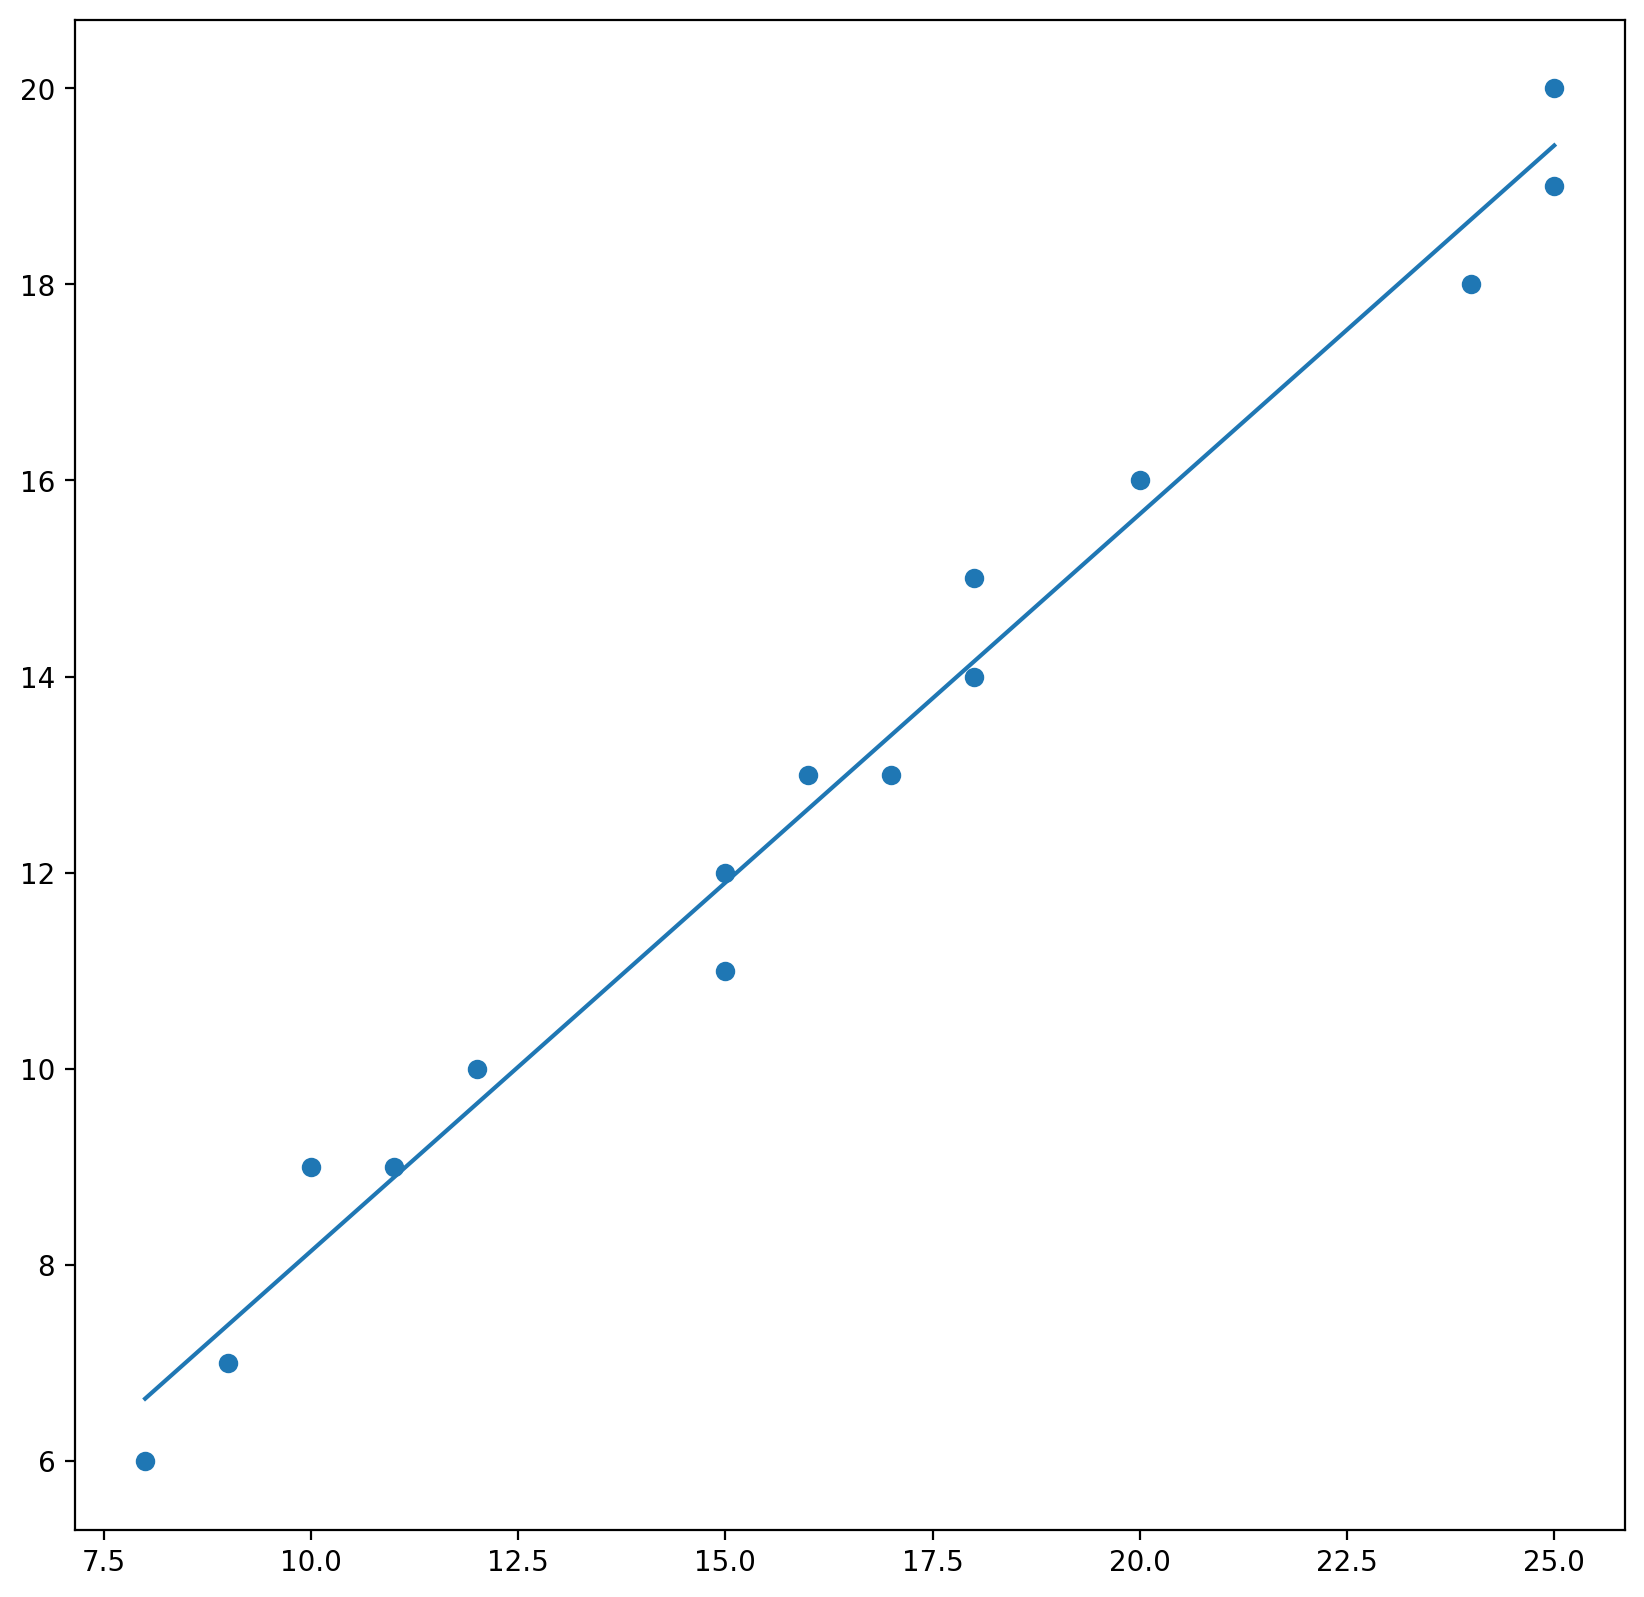

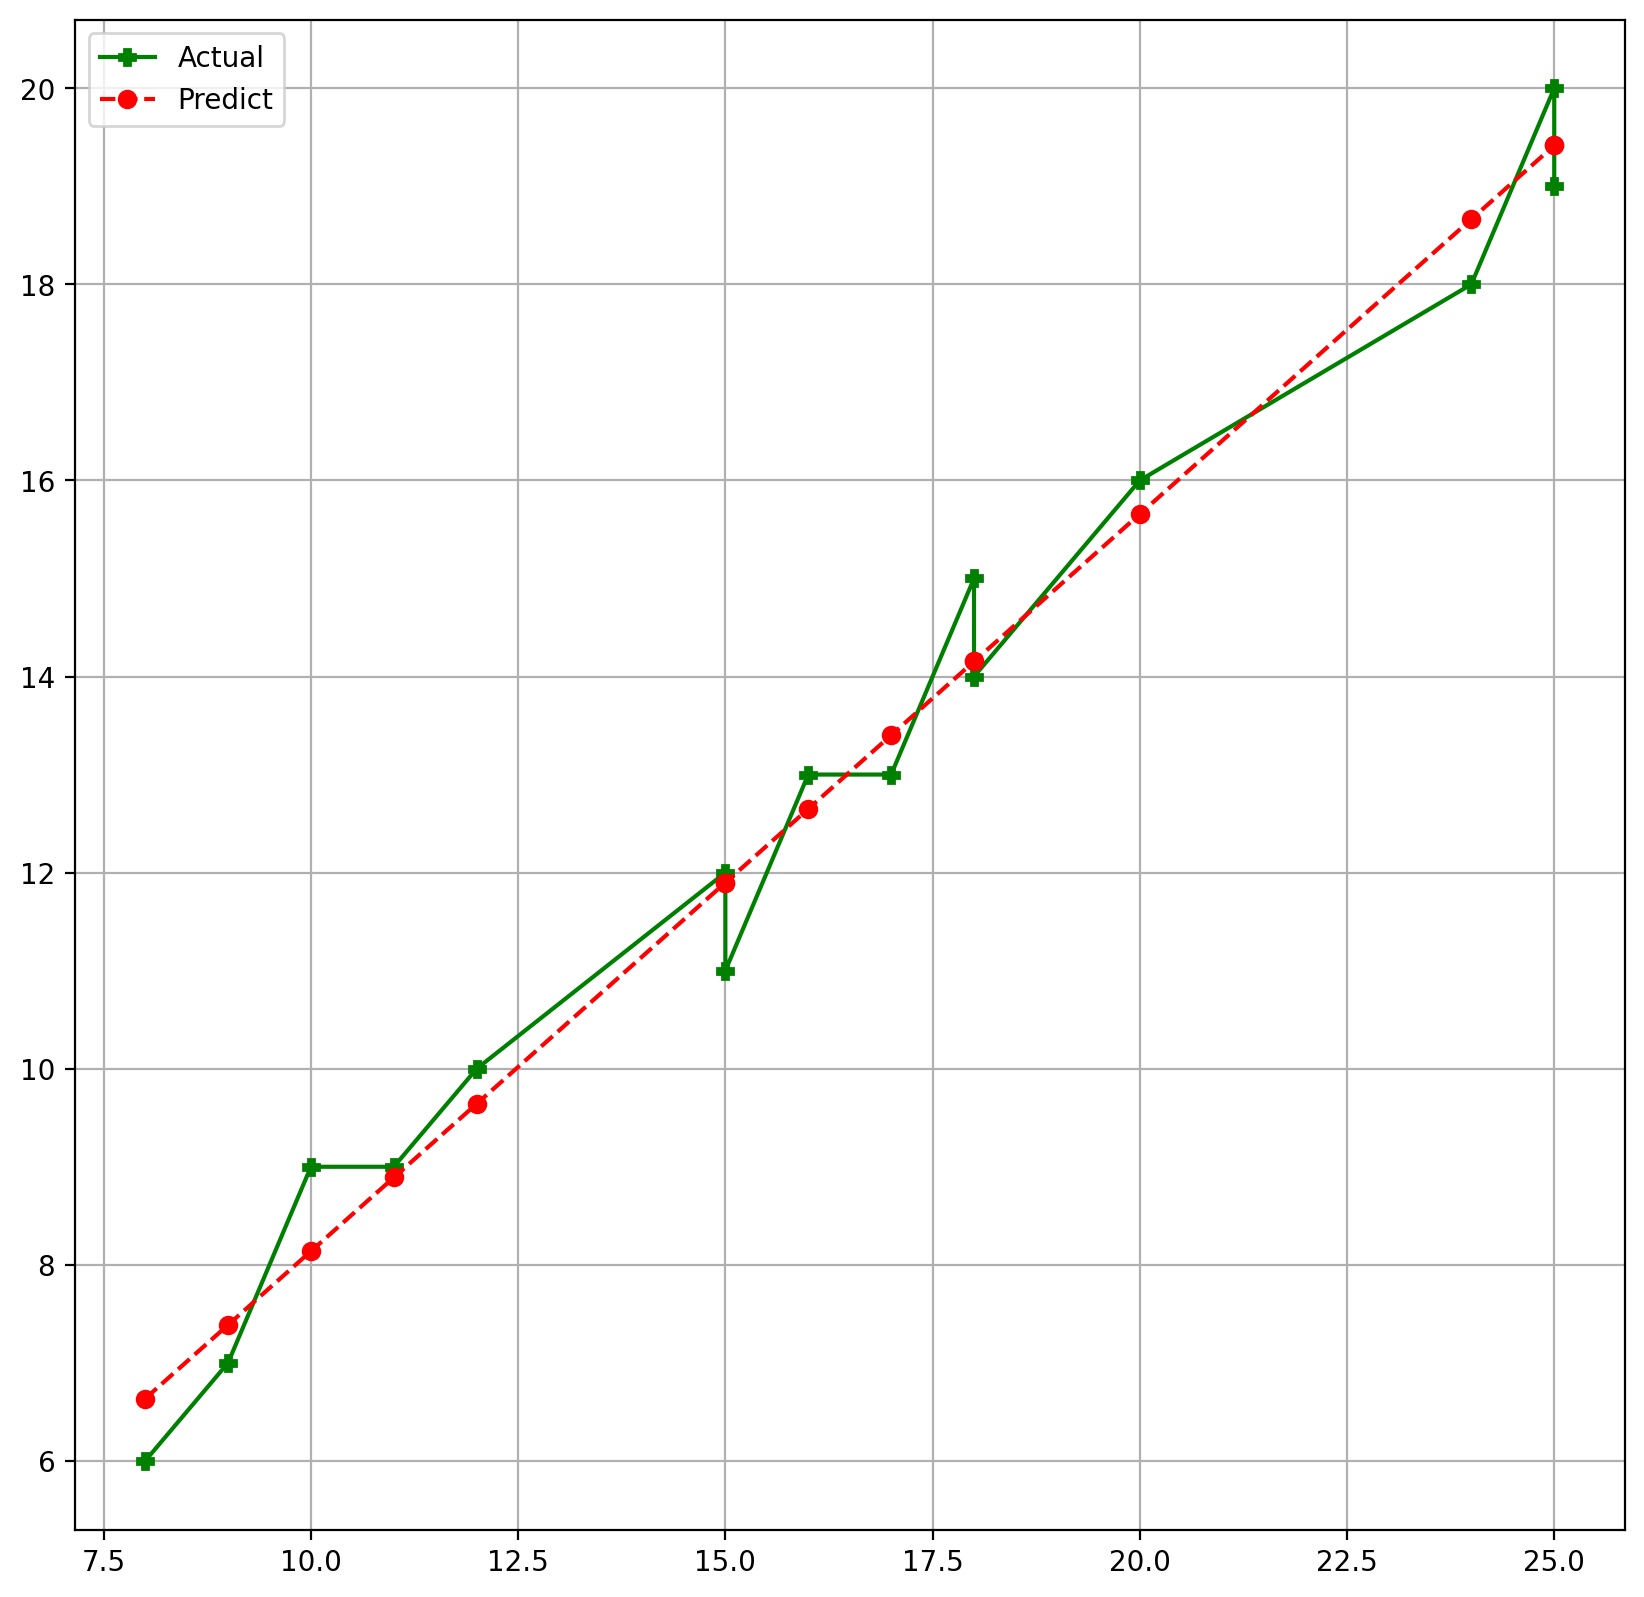

[16.40867993 20.91952984 23.17495479]


In [21]:
# Cách 3: Dùng OLS trong statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = pd.read_csv('./Data/Income.csv')
print(data.describe())
y = data['Expenditure'] # Lấy ra cột Expenditure (dữ liệu dạng cột)
x = data['Income'] # Lấy ra cột Income (dữ liệu dạng cột)
print(x)
x_, y_ = np.array(x), np.array(y)
print(x_)
# Thêm cột index bằng 1 để tính được intercept, do Income đã có hệ số góc đại diện (riêng đối với cách này)
x_= sm.add_constant(x_)
print(x_)
model = sm.OLS(y_, x_) # Truyền biến phụ thuộc trước mới tới biến độc lập, ngược lại với các mô hình khác
res = model.fit() # Bước 1 trong quá trình lấy ra giá trị thông số thống kê
print(res.summary()) # Bước 2: Hiện giá trị thông số thống kê
R_sqr = res.rsquared
params = res.params
print(params) # Hiện hai kết quả theo thứ tự: intercept, coefficient
plt.scatter(x, y)
plt.plot(x, params[0] + params[1] * x ) 
plt.show()
pre_val = res.predict(x_)
plt.plot(x, y, color='green', label='Actual', marker='P')
plt.plot(x, pre_val, color='r', label='Predict', linestyle='--', marker='o')
plt.grid()
plt.legend()
plt.show()
# Predict future value
new_value = np.array([21, 27, 30]) # Futute income
new_income = sm.add_constant(new_value)
pre_val2 = res.predict(new_income) # Future expenditure
print(pre_val2)

## MULTIPLE LINEAR REGRESSION

           Car       Model  Volume  Weight  CO2
0       Toyoty        Aygo    1000     790   99
1   Mitsubishi  Space Star    1200    1160   95
2        Skoda      Citigo    1000     929   95
3         Fiat         500     900     865   90
4         Mini      Cooper    1500    1140  105
5           VW         Up!    1000     929  105
6        Skoda       Fabia    1400    1109   90
7     Mercedes     A-Class    1500    1365   92
8         Ford      Fiesta    1500    1112   98
9         Audi          A1    1600    1150   99
10     Hyundai         I20    1100     980   99
11      Suzuki       Swift    1300     990  101
12        Ford      Fiesta    1000    1112   99
13       Honda       Civic    1600    1252   94
14      Hundai         I30    1600    1326   97
15        Opel       Astra    1600    1330   97
16         BMW           1    1600    1365   99
17       Mazda           3    2200    1280  104
18       Skoda       Rapid    1600    1119  104
19        Ford       Focus    2000    13

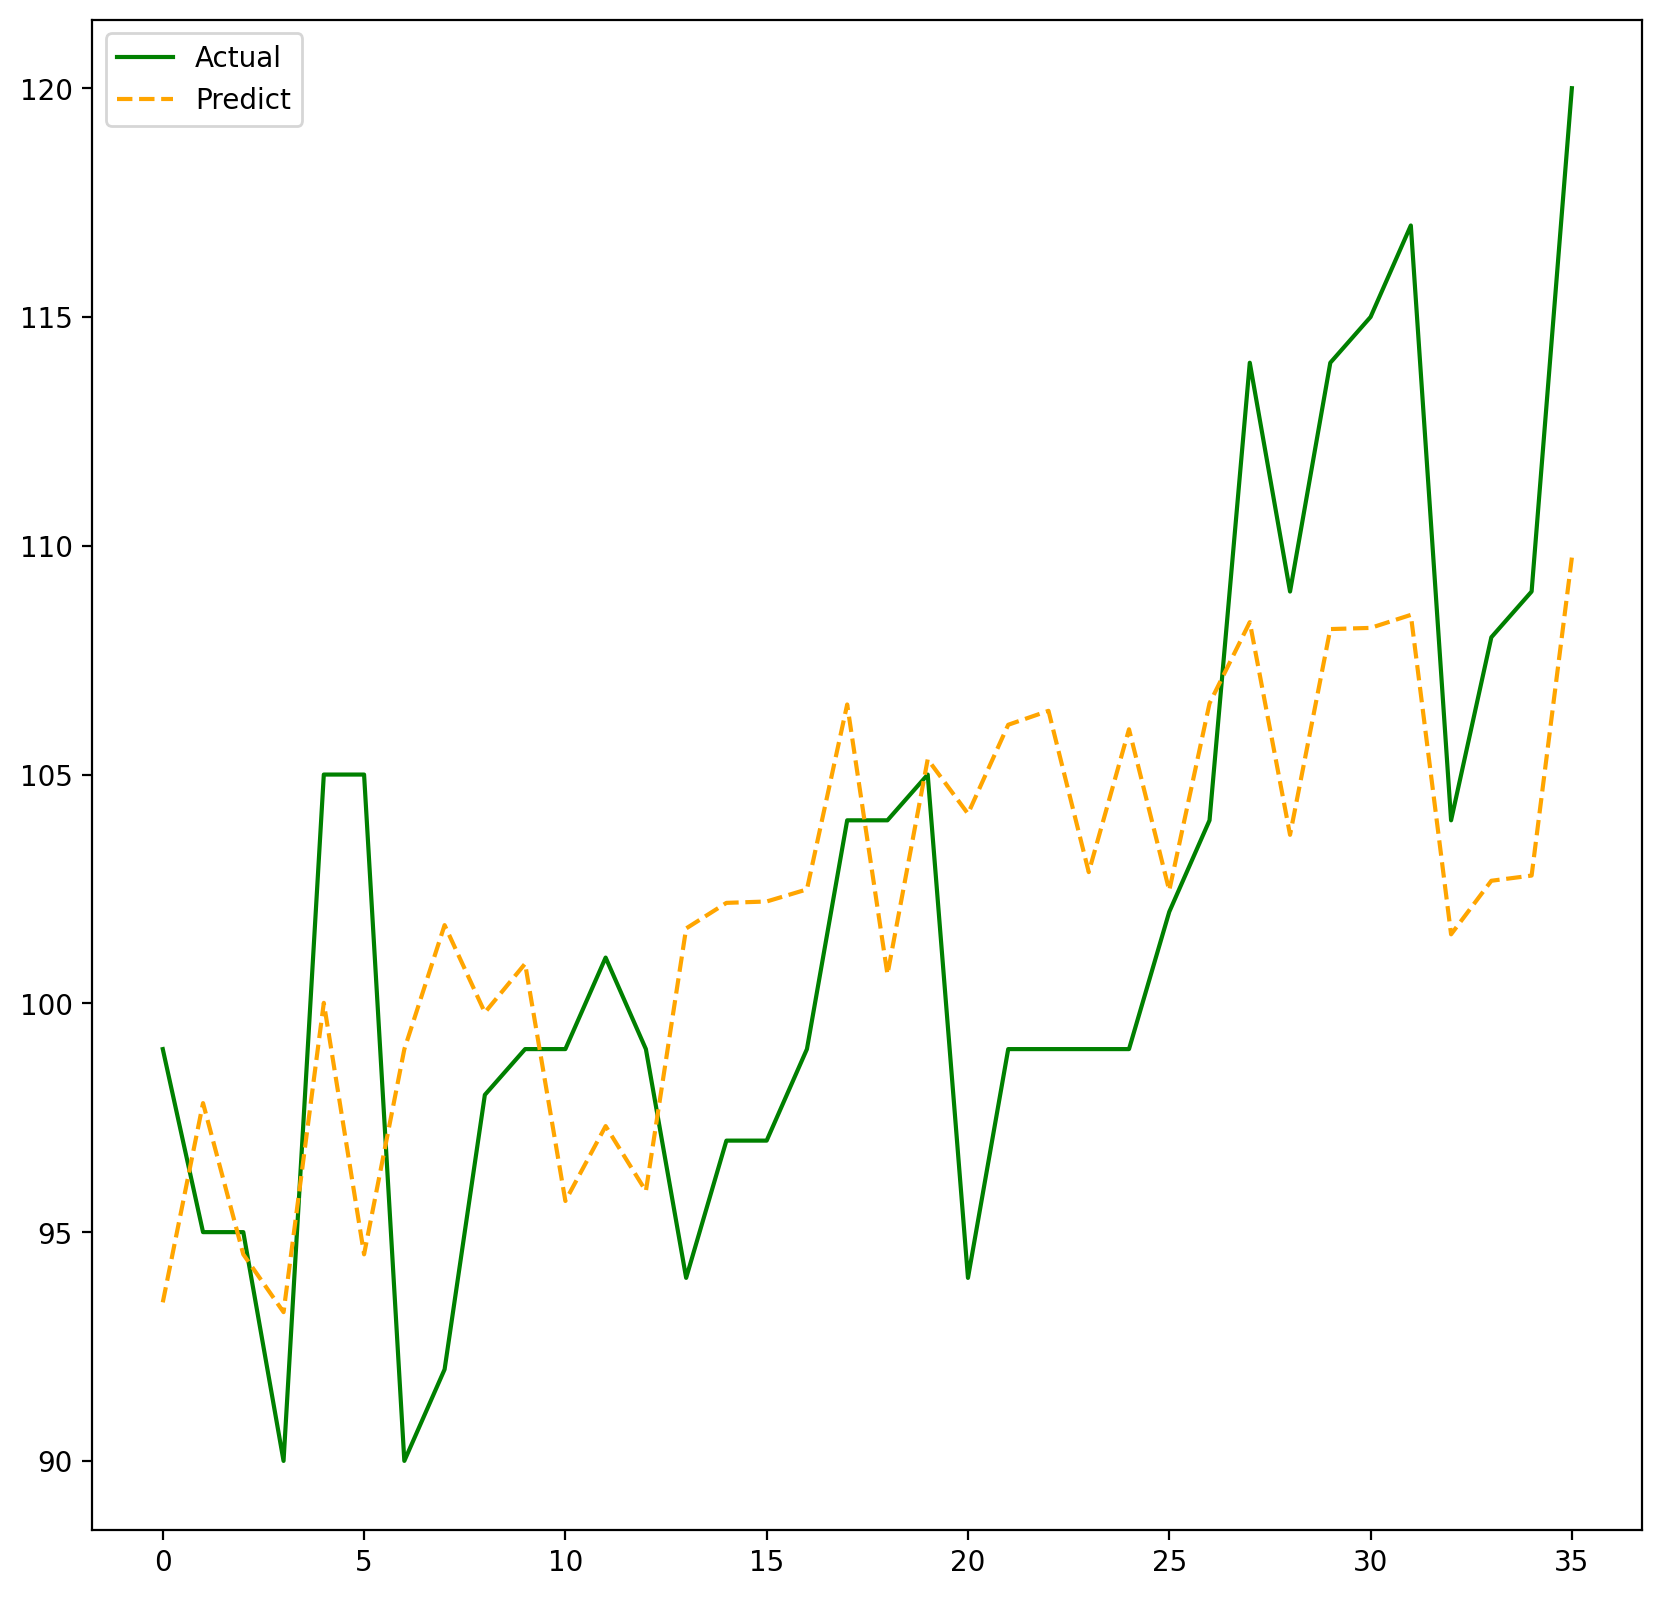

[[101.16797498]
 [ 98.85182875]]


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_csv('./Data/Cars.csv')
print(df)
x = df[['Weight', 'Volume']]
y = df[['CO2']]
model = LinearRegression().fit(x, y)
R_square = model.score(x, y)
intercept = model.intercept_
coefs = model.coef_
print(R_square, intercept, coefs)
pre_val = model.predict(x) # Do x là dataframe, k phải 1 cột giống vd income
plt.plot(y, color='green', label='Actual') # Không ghi giá trị x, marker vào vì sẽ làm rối graph
plt.plot(pre_val, color='orange', label='Predict', linestyle='--') 
plt.legend()
plt.show()
x2 = [[1500, 1300], [1400, 1100]]
y2 = model.predict(x2)
print(y2)

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
print(df)
# Step by step: Split dataset
df = pd.read_excel('./Data/SALES.xlsx')
dfs = df[['Sales_Volume', 'Price', 'Ads_Cost']]
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(dfs.drop('Sales_Volume', axis=1), dfs['Sales_Volume'], test_size=0.3, random_state=42) # phần test sẽ chiếm 10% trong tập dữ liệu
new_model = LinearRegression().fit(X_train, y_train)
print(new_model.score(X_test, y_test) * 100)
yhat = new_model.predict(X_test)
print(yhat)
print(metrics.mean_squared_error(yhat,y_test))

    Week  Sales_Volume  Price  Ads_Cost
0      1           350    5.5       3.3
1      2           460    7.5       3.3
2      3           350    8.0       3.0
3      4           430    8.0       4.5
4      5           350    6.8       3.0
5      6           380    7.5       4.0
6      7           430    4.5       3.0
7      8           480    6.5       3.8
8      9           450    7.0       3.5
9     10           490    5.0       4.0
10    11           340    7.2       3.5
11    12           290    7.8       3.1
12    13           440    5.9       4.0
13    14           450    5.0       3.5
14    15           300    7.0       2.7
50.73659955146861
[485.27934825 357.67822139 422.91077529 448.58019565 430.33055167]
2490.757526677747


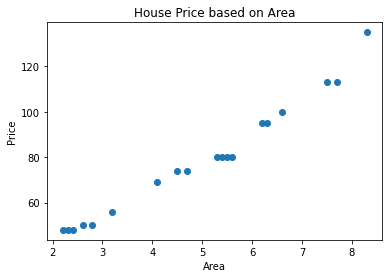

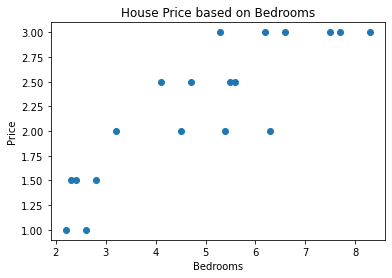

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     346.1
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           6.79e-14
Time:                        20:23:18   Log-Likelihood:                -3.0231
No. Observations:                  19   AIC:                             12.05
Df Residuals:                      16   BIC:                             14.88
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1646      0.251     -4.643      0.0

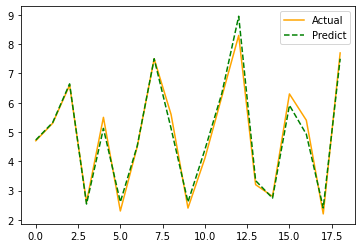

[4.79215037 7.30392486]


In [16]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# Load data
df = pd.read_csv('./Data/HomePrices.csv')
x = df[['Area', 'Bedrooms']]
y = df['Price']
x_, y_ = np.array(x), np.array(y)
# Visualization
plt.scatter(y, df.Area)
plt.title('House Price based on Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()
plt.scatter(y, df.Bedrooms)
plt.title('House Price based on Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()
# Model
x_ = sm.add_constant(x_)
model = sm.OLS(y_, x_)
result = model.fit()
R_sqr = result.rsquared
params = result.params # Hiện giá trị intercept, slope của biến x1, x2
print(result.summary()) # Chỉ có statsmodels mới coi được summary
# Predict present value
pre_y = result.predict(x_)
plt.plot(y, label='Actual', color='orange')
plt.plot(pre_y, label='Predict', color='green', linestyle='--')
plt.legend()
plt.show()
# Predict future value
new_x = np.array([[75, 2.5], [110, 3]])
new_x = sm.add_constant(new_x) # Phải có dòng này do đang xài statsmodels
pre_new_y = result.predict(new_x)
print(pre_new_y)

In [1]:
data = pd.read_csv("Example.csv")
x = preprocessing.scale(data)
kmeans = KMeans(4)
kmeans.fit(x)
plt.scatter(data["Satisfaction"], data["Loyalty"], c=kmeans.fit_predict(x), cmap="rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

NameError: name 'preprocessing' is not defined

## REAL ESTATE ANALYSIS

In [47]:
import pandas as pd
import statsmodels.api as sm
re = pd.read_csv('./Data/Real_Estate.csv')
x = np.array(re[['distance to the nearest station', 'number of convenience stores', 'latitude', 'longitude']])
y = re[['house price of unit area']]
x = sm.add_constant(x)
# Create model
model = sm.OLS(y, x).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     house price of unit area   R-squared:                       0.521
Model:                                  OLS   Adj. R-squared:                  0.516
Method:                       Least Squares   F-statistic:                     111.3
Date:                      Tue, 10 Aug 2021   Prob (F-statistic):           4.24e-64
Time:                              10:40:34   Log-Likelihood:                -1515.3
No. Observations:                       414   AIC:                             3041.
Df Residuals:                           409   BIC:                             3061.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

      No  transaction date  house age  distance to the nearest station  \
0      1          2012.917       32.0                         84.87882   
1      2          2012.917       19.5                        306.59470   
2      3          2013.583       13.3                        561.98450   
3      4          2013.500       13.3                        561.98450   
4      5          2012.833        5.0                        390.56840   
..   ...               ...        ...                              ...   
409  410          2013.000       13.7                       4082.01500   
410  411          2012.667        5.6                         90.45606   
411  412          2013.250       18.8                        390.96960   
412  413          2013.000        8.1                        104.81010   
413  414          2013.500        6.5                         90.45606   

     number of convenience stores  latitude  longitude  \
0                              10  24.98298  121.5402

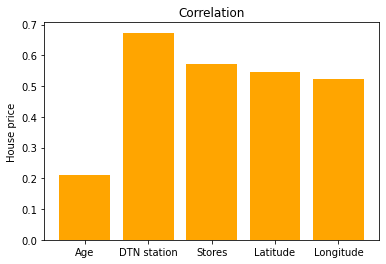

52.11731478336783 [-5335.62840696] [[-4.50330336e-03  1.07229972e+00  2.15230605e+02]]


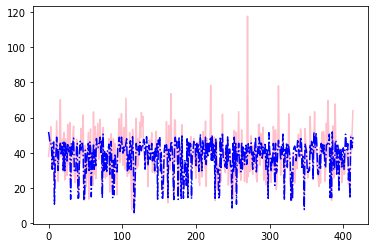

[[44.29916615]]


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
re = pd.read_csv('./Data/Real_Estate.csv')
print(re)
print(re['longitude'].corr(re['house price of unit area'])) # Test thử kết quả
print(re.isnull().sum())
print('Result of duplicate:', re.duplicated().sum())
# Take out only the correlation between dependent variable and independent variables
# C1:
c = re.corr().iloc[-1][2:] 
c1 = c.iloc[0:5]
c2 = pd.DataFrame(c1)
# C2:
f = ['house age', 'distance to the nearest station', 'number of convenience stores', 'latitude', 'longitude']
cor = []
for i in f:
    k = re[i].corr(re['house price of unit area'])
    if k < 0:
        k *= -1
        cor.append(k)
    else:
        cor.append(k)
x = ['Age', 'DTN station', 'Stores', 'Latitude', 'Longitude']
plt.bar(x, cor, color='orange')
plt.title('Correlation')
plt.ylabel('House price')
plt.show()
# Create model
from sklearn.linear_model import LinearRegression
x = re[['distance to the nearest station', 'number of convenience stores', 'latitude']]
y = re[['house price of unit area']]
model = LinearRegression().fit(x, y)
print(model.score(x, y) * 100, model.intercept_, model.coef_) 
yhat = model.predict(x)
plt.plot(y, color='pink', label='Actual')
plt.plot(yhat, color='blue', label='Predict', linestyle='-.')
plt.show()
pre_x = [[390.56840, 5, 24.97937]]
pre_y = model.predict(pre_x)
print(pre_y)

## FISH MARKET ANALYSIS

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]
Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64
Result of duplicate: 0
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
P

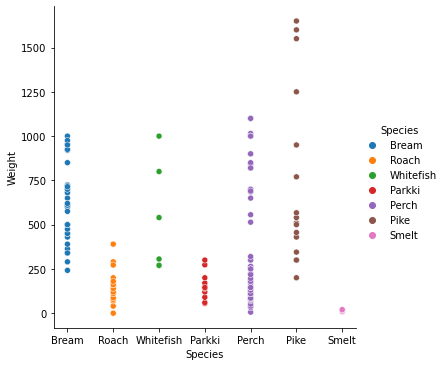

      Species  Weight  Length1  Length2  Length3   Height   Width
55  Whitefish   270.0     23.6     26.0     28.7   8.3804  4.2476
56  Whitefish   270.0     24.1     26.5     29.3   8.1454  4.2485
57  Whitefish   306.0     25.6     28.0     30.8   8.7780  4.6816
58  Whitefish   540.0     28.5     31.0     34.0  10.7440  6.5620
59  Whitefish   800.0     33.7     36.4     39.6  11.7612  6.5736
60  Whitefish  1000.0     37.3     40.0     43.5  12.3540  6.5250


<Figure size 432x288 with 0 Axes>

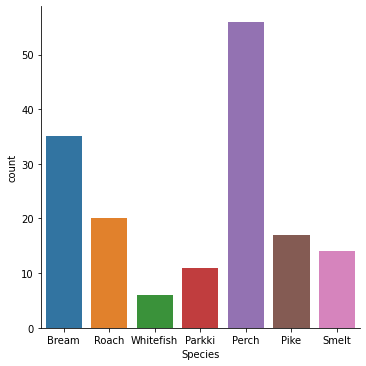

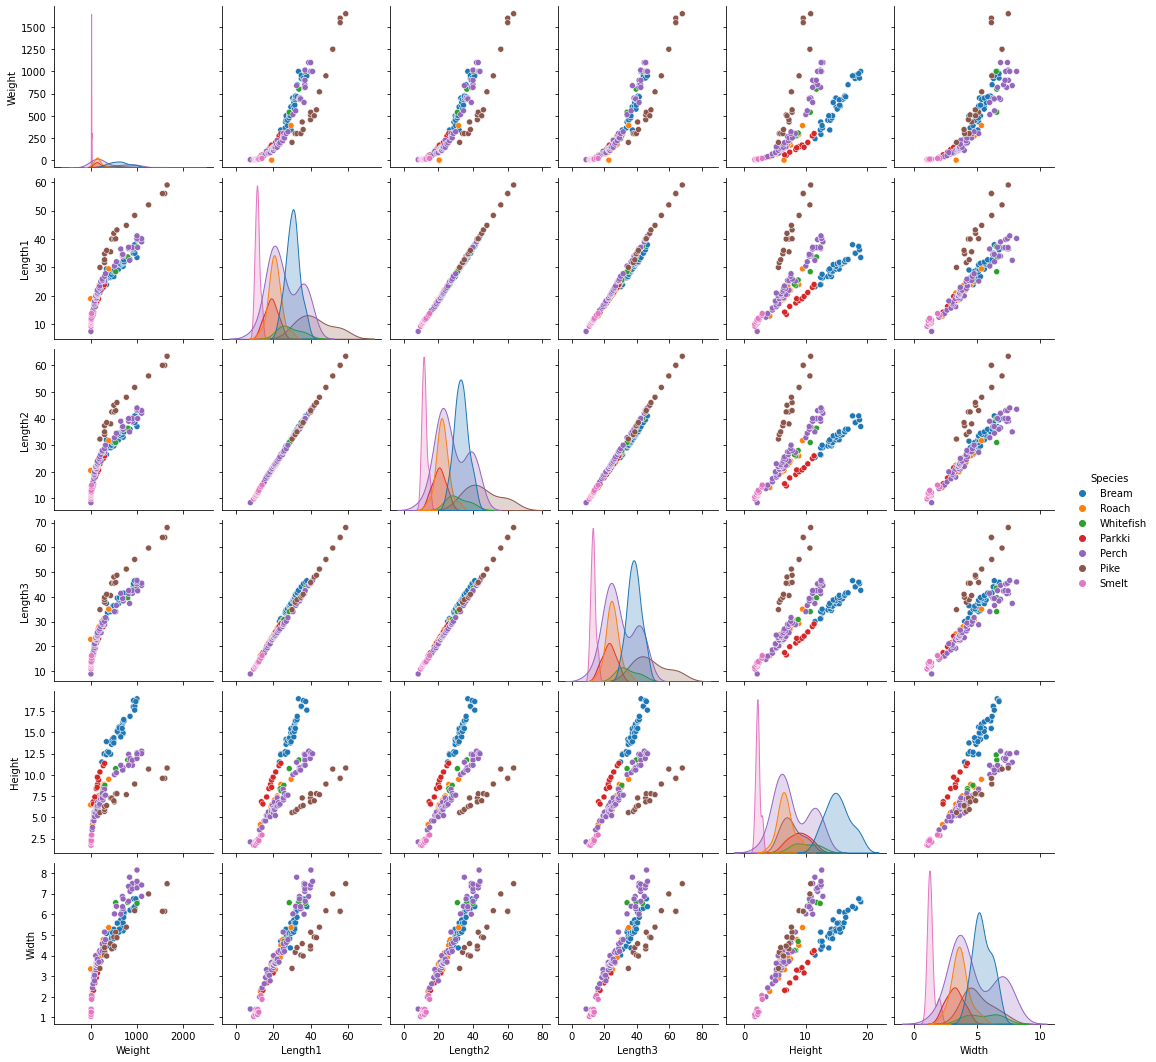

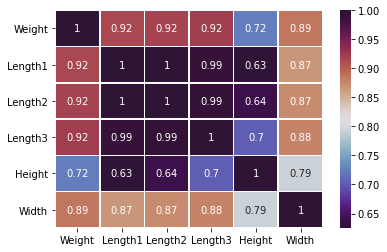

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     556.4
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           9.97e-72
Time:                        12:28:54   Log-Likelihood:                -993.47
No. Observations:                 159   AIC:                             1993.
Df Residuals:                     156   BIC:                             2002.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -520.9390     29.332    -17.760      0.0

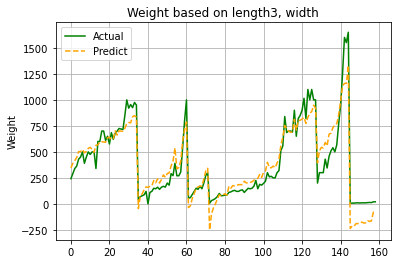

[[30.      4.02  ]
 [33.5     4.4555]]
[346.45459118 445.29402816]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
fish = pd.read_csv('./Data/Fish.csv')
print(fish)
# Check data
print(fish.isnull().sum().sort_values(ascending=True))
print('Result of duplicate:', fish.duplicated().sum())
df = fish.Species.value_counts()
print(df)
sns.relplot(x='Species', y='Weight', data=fish, hue='Species', kind='scatter')
plt.show()
plt.clf()
print(fish[fish['Species'] == 'Whitefish'])
sns.catplot(x='Species', data=fish, kind='count') # Count fish group by their species
sns.pairplot(fish, hue='Species')
plt.show()
plt.clf()
# Drop row have Markerel: fish_drop_Markerel = fish.drop(fish.index[(fish['Species'] == 'Markerel')], axis=0)
# Correlation
sns.heatmap(fish.corr(), annot=True, linewidths=.6, linecolor='white', cmap='twilight_shifted')
plt.show()
plt.clf()
x = np.array(fish[['Length3', 'Width']])
y = np.array(fish['Weight'])
# Create model
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())
# Visualize
yhat = model.predict(x)
plt.plot(y, color='green', label='Actual') # Không ghi giá trị x, marker vào vì sẽ làm rối chart
plt.plot(yhat, color='orange', label='Predict', linestyle='--') 
plt.ylabel('Weight')
plt.title('Weight based on length3, width')
plt.legend()
plt.grid()
plt.show()
# Predict value
new_x = np.array([[30.0, 4.0200], [33.5, 4.4555]])
print(new_x)
new_x = sm.add_constant(new_x)
pre_new_y = model.predict(new_x)
print(pre_new_y)

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64
Result of duplicate: 0
            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
1%        6.364000    9.706000   10.206000   11.264000    1.874056    1.148400
10%      29.580000   13.440

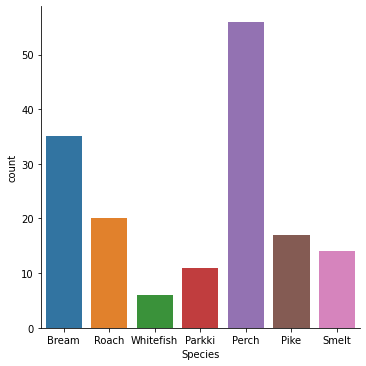

     Weight  Length1  Length2  Length3   Height   Width  Species_Bream  \
0     242.0     23.2     25.4     30.0  11.5200  4.0200              1   
1     290.0     24.0     26.3     31.2  12.4800  4.3056              1   
2     340.0     23.9     26.5     31.1  12.3778  4.6961              1   
3     363.0     26.3     29.0     33.5  12.7300  4.4555              1   
4     430.0     26.5     29.0     34.0  12.4440  5.1340              1   
..      ...      ...      ...      ...      ...     ...            ...   
154    12.2     11.5     12.2     13.4   2.0904  1.3936              0   
155    13.4     11.7     12.4     13.5   2.4300  1.2690              0   
156    12.2     12.1     13.0     13.8   2.2770  1.2558              0   
157    19.7     13.2     14.3     15.2   2.8728  2.0672              0   
158    19.9     13.8     15.0     16.2   2.9322  1.8792              0   

     Species_Parkki  Species_Perch  Species_Pike  Species_Roach  \
0                 0              0          

<Figure size 432x288 with 0 Axes>

In [22]:
# C2: Improve R-square metric by converting categorical variable
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
fish = pd.read_csv('./Data/Fish.csv')
print(fish.head())
print(fish.isnull().sum().sort_values(ascending=True))
print('Result of duplicate:', fish.duplicated().sum())

# Descriptive statistics of the numeric variables
print(fish.describe(percentiles = [0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.99]))

# Remove outliers with extreme weights using IQR
Q1 = fish["Weight"].quantile(0.25)
Q3 = fish["Weight"].quantile(0.75)
IQR = Q3 - Q1
fish_cleaned = fish[~((fish.Weight < (Q1 - 1.5 * IQR)) | (fish.Weight > (Q3 + 1.5*IQR)))]
print(fish_cleaned)

# Examine categorical variable Species
species_counts = fish.Species.value_counts()
sns.catplot(x = 'Species', data=fish, kind='count')
plt.show()
plt.clf()

# Convert categorical data
fish_encoded = pd.get_dummies(fish_cleaned)
print(fish_encoded)

# Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Isolate the target variable and the features
y = fish_encoded.Weight
X = fish_encoded.drop('Weight', axis=1)

# random_state ensures that the splits generated are reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression().fit(X_train, y_train)
print(model.score(X_test, y_test) * 100, model.intercept_, model.coef_)

# Predict values
yhat = model.predict(X_test)
print(yhat)
print(y_test)

# Evaluate predictions
a = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % a)
from math import sqrt
s = sqrt(mean_squared_error(y_test, yhat))
print('RMSE: %.3f' % s)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

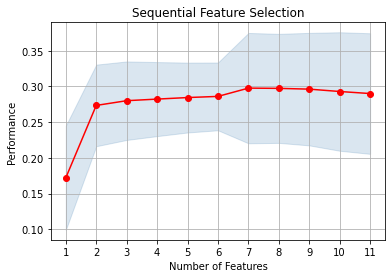

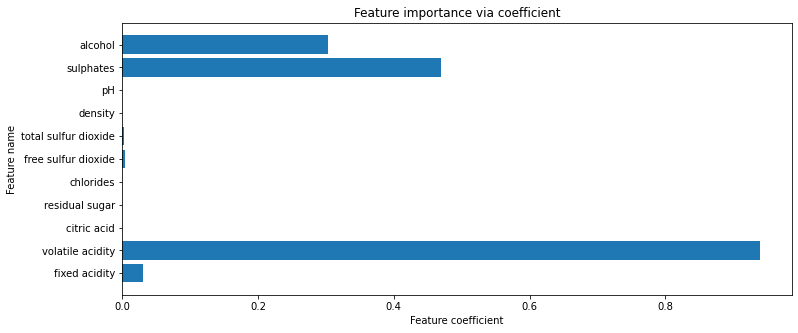

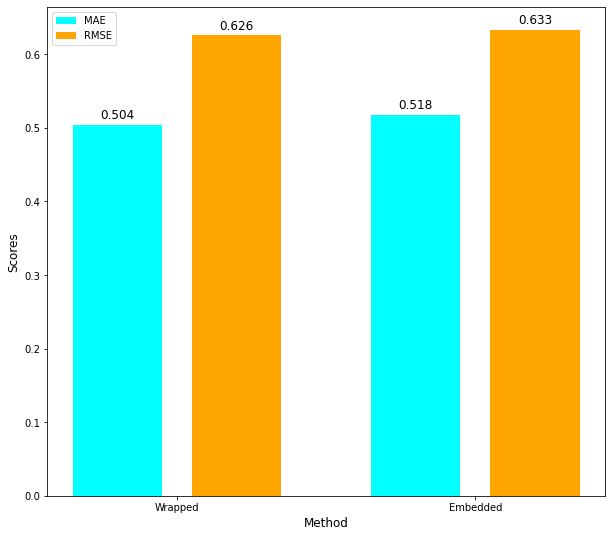

In [54]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from math import *

w = pd.read_csv('./Data/winequality-red.csv')
print(w)
y = w.quality
x = w.drop(['quality'], axis=1)

# Feature seletion with Wrapped method
sf_sfs = sfs(LinearRegression(), k_features=(1, 11), forward=True, floating=False, scoring='r2', cv=5).fit(x, y)
fig = plot_sfs(sf_sfs.get_metric_dict(), marker='o', color='red', figsize=(6, 4))
plt.title('Sequential Feature Selection')
plt.grid()
plt.show()

x_wrapped = w[list(sf_sfs.k_feature_names_)]
model = LinearRegression().fit(x_wrapped, y)

# Feature selection with Embedded method (Lasso)
import numpy as np
from sklearn.feature_selection import SelectFromModel as sfm
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
plt.subplots(figsize=(12, 5))

coef = np.abs(LassoCV().fit(x, y).coef_)

plt.barh(width=coef, y=list(x.columns.values))
plt.xlabel('Feature coefficient')
plt.ylabel('Feature name')
plt.title('Feature importance via coefficient')
plt.show()

sel_lasso = sfm(LassoCV(cv=5), threshold=np.sort(coef)[-5] + 0.01)
sf_sfm = sel_lasso.fit(x, y)
x_embedded = w[x.columns[sel_lasso.get_support()]]
model = LassoCV().fit(x_embedded, y)

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Create subset data with features selected by filter
# X_train_filter = X_train[best[max(r_score)]]
# X_test_filter = X_test[best[max(r_score)]]
# model_filter = LinearRegression().fit(X_train_filter, y_train)
# yhat_filter = model_filter.predict(X_test_filter)
# print('MAE: %.3f' % mean_absolute_error(y_test, yhat_filter))
# print('RMSE: %.3f' % sqrt(mean_squared_error(y_test, yhat_filter)))

# Create subset data with features selected by wrapped
X_train_wrapped = X_train[list(sf_sfs.k_feature_names_)]
X_test_wrapped = X_test[list(sf_sfs.k_feature_names_)]
model_wrapped = LinearRegression().fit(X_train_wrapped, y_train)
yhat_wrapped = model_wrapped.predict(X_test_wrapped)
# print('MAE: %.3f' % mean_absolute_error(y_test, yhat_wrapped))
# print('RMSE: %.3f' % sqrt(mean_squared_error(y_test, yhat_wrapped)))

# Create subset data with features selected by embedded
X_train_embedded = X_train[x.columns[sel_lasso.get_support()]]
X_test_embedded = X_test[x.columns[sel_lasso.get_support()]]
model_embedded = LinearRegression().fit(X_train_embedded, y_train)
yhat_embedded = model_embedded.predict(X_test_embedded)
# print('MAE: %.3f' % mean_absolute_error(y_test, yhat_embedded))
# print('RMSE: %.3f' % sqrt(mean_squared_error(y_test, yhat_embedded)))

# Visualize evaluation
num = np.arange(2)
y1 = [round(mean_absolute_error(y_test, yhat_wrapped),3), round(mean_absolute_error(y_test, yhat_embedded),3)]
y2 = [round(sqrt(mean_squared_error(y_test, yhat_wrapped)),3), round(sqrt(mean_squared_error(y_test, yhat_embedded)),3)]

fig, ax = plt.subplots()
width=0.3
plt.rcParams['figure.figsize'] = (10, 9)

fig1 = plt.bar(num - 0.2, y1, width=0.3, color='cyan')
fig2 = plt.bar(num + 0.2, y2, width=0.3, color='orange')

for i in fig1:
    h = i.get_height()
    ax.annotate('{}'.format(h), xy=(i.get_x() + i.get_width() / 2, h), 
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=12)
for i in fig2:
    h = i.get_height()
    ax.annotate('{}'.format(h), xy=(i.get_x() + i.get_width() / 2, h), 
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

plt.xticks(num, ['Wrapped', 'Embedded'], fontsize=10)
plt.xlabel("Method", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.legend(["MAE", "RMSE"], loc='upper left')
plt.show()

## HEALTH INSURANCE ANALYSIS

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Result of duplicate: 1
southeast    364
southwest    325
nor

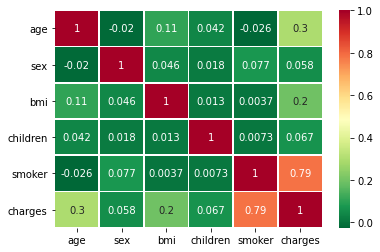

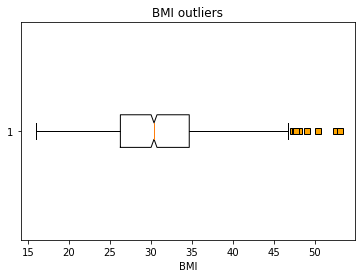

<Figure size 432x288 with 0 Axes>

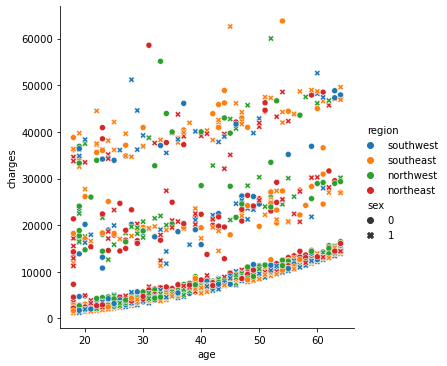

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1314.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:47:49   Log-Likelihood:                -13547.
No. Observations:                1337   AIC:                         2.710e+04
Df Residuals:                    1333   BIC:                         2.712e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.167e+04    938.136    -12.441      0.0

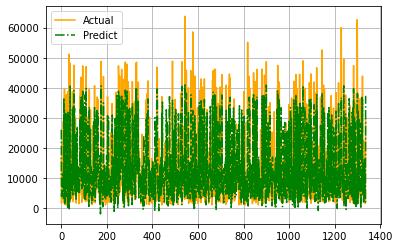

[26081.4105706   5948.02252456]
0.7416706796276937
[ 9467.22775911  3210.33428201 35902.50974513 ...   757.57837024
  7294.66493329  9017.1454407 ]


In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
hi = pd.read_csv('./Data/insurance.csv')
print(hi)
print(hi.isnull().sum())
print('Result of duplicate:', hi.duplicated().sum()) # Xuất hiện 1 dòng bị lặp
hi.drop_duplicates(inplace=True)
print(hi.region.value_counts())
# Transform data, map and replace are interchangeable
hi['smoker'] = hi['smoker'].map({'yes':1, 'no':0})
hi['sex'] = hi['sex'].replace({'male':1, 'female':0})
print(hi)
sns.heatmap(hi.corr(), annot=True, data=hi, linewidths=.7, linecolor='white', cmap='RdYlGn_r')
plt.show()
plt.clf()
# Check outliers by boxplot (chưa biết để làm gì ^^)
b = dict(markerfacecolor='orange', marker='s')
plt.boxplot(hi['bmi'], vert=False, notch=True, flierprops=b) 
# vert=True box đặt đứng, notch=True: có lõm ở giữa => Có outline ở mỗi biến này
plt.xlabel('BMI')
plt.title('BMI outliers')
plt.show()
plt.clf()
sns.relplot(x='age', y='charges', data=hi, hue='region', style='sex')
plt.show()
plt.clf()
# Create model 
x = np.array(hi[['smoker', 'age', 'bmi']])
y = np.array(hi['charges'])
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())
# Visualize
plt.plot(y, label='Actual', color='orange')
plt.plot(yhat, label='Predict', color='green', linestyle='-.')
plt.legend()
plt.grid()
plt.show()
# Predict
new_x = np.array([[1, 19, 27.900], [0, 32, 28.880]])
new_x = sm.add_constant(new_x)
pre_y = model.predict(new_x)
print(pre_y)
# Try splitting dataset to train and test set
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
new_model = LinearRegression().fit(X_train, y_train)
print(new_model.score(X_train, y_train))
pre_val2 = new_model.predict(X_train)
print(pre_val2)
# Therefore, model train did predict not much better than the original model 

## VISUALIZATION

In [ ]:
def prettify_graph(graph):
    """Modify the given graph according to Jimmy's requests: add a title, make the y-axis
    start at 0, label the y-axis. (And, if you're feeling ambitious, format the tick marks
    as dollar amounts using the "$" symbol.)
    """
    graph.set_title("Results of 500 slot machine pulls")
    # Complete steps 2 and 3 here
    graph.set_ylim(bottom=0)
    graph.set_ylabel('Balance')
    ticks = graph.get_yticks()
    new_labels = ['${}'.format(int(amt)) for amt in ticks]
    graph.set_yticklabels(new_labels)

# supported values for linestyle are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
import seaborn as sns
print(sns.get_dataset_names())
#%%
df = pd.read_csv('Housing.csv')
dat = df.sample(400)
sns.scatterplot(x='housing_median_age', y='median_house_value', data=dat, hue='ocean_proximity', size='median_income')
#%%
df = pd.read_csv('Life_Expectancy.csv')
print(df)
dat = df[df['Country'].isin(['Viet Nam', 'China', 'Germany', 'Japan', 'France'])]
sns.scatterplot(x='Life expectancy', y='Schooling', data=dat, hue='Country')
#%%
df = pd.read_csv('Housing.csv')
dat = df.sample(1000)
sns.lineplot(x='housing_median_age', y='median_house_value', data=dat)
# Matplotlib
# Thiết lập thông số cấu hình chung cho biểu đồ
import matplotlib.pyplot as plt
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.size'] = 13
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['legend.loc'] = 'best'
# Line graph
df = pd.read_csv("NetProfit.csv")
# supported values for linestyle are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
plt.plot('Year', 'VNM', data=df, color='b', linestyle='-', marker='o')
plt.plot('Year', 'PNJ', data=df, color='g', linestyle='--', marker='s')
plt.plot('Year', 'VCB', data=df, color='#FF0000', linestyle=':', marker='+')
plt.plot('Year', 'VIC', data=df, color='orange', linestyle='-.', marker='*')
plt.title('Lợi nhuận của VNM, PNJ, VCB, VIC từ năm 2010 đến 2020', fontweight='bold')
plt.xlabel('Năm', fontweight='bold')
plt.ylabel('Lợi nhuận', fontweight='bold')
plt.legend()
plt.show()
# Bar chart cột đứng
df = pd.read_csv("PVD_Asset.csv")
plt.bar('Year', 'Liabilities', data=df)
plt.title('Nợ của PVD qua các năm')
plt.xlabel('Năm')
plt.ylabel('Nợ')
plt.show()
# Bar chart cột ngang
df = pd.read_csv("PVD_Asset.csv")
plt.barh('Year', 'Equity', data=df)
plt.title('Vốn của PVD qua các năm')
plt.xlabel('Năm')
plt.ylabel('Vốn')
plt.show()
# Bar chart cột chồng
df = pd.read_csv("PVD_Asset.csv")
plt.bar('Year', 'Liabilities', data=df, color='orange', label='Nợ')
plt.bar('Year', 'Equity', data=df, bottom='Liabilities', color='darkgreen', label='Vốn')
plt.title('Tài sản của PVD từ năm 2010 đến năm 2020')
plt.xlabel('Năm')
plt.ylabel('Tỷ đồng')
plt.legend()
plt.show()
#%% Basic scatter plot
df = pd.read_csv("Income.csv")
print(df)
plt.scatter('Income', 'Expenditure', data=df, color='pink', alpha=0.8)
plt.show()
#%%
print(df.loc[8]) # Xuất số liệu ứng với tên cột là 8
print(df.iloc[[4, 6]]) # Xuất số liệu ứng với thứ tự cột là 4, 6
print(df.iloc[[4, 6], 0]) # Xuất số liệu ứng với thứ tự cột là 4, 6 nhưng chỉ lấy cột thứ 0 (là Income)
# alpha is the opacity of the bubbles, 0 <= alpha <= 1, where 0 is totally transparent, 1 is not at all
plt.xlabel('Thu nhập', fontweight='bold')
plt.ylabel('Chi tiêu', fontweight='bold')
plt.show()
# Thay đổi scatter plot
df = pd.read_csv("Income.csv")
print(df)
colors = np.random.rand(df.shape[0]) # Random màu ngẫu nhiên
area = df['Income'].values * 50 # Tăng kích thước điểm dữ liệu lên 50 lần
plt.scatter('Income', 'Expenditure', data=df, c=colors, s=area, alpha=0.8)
plt.xlabel('Thu nhập', fontweight='bold')
plt.ylabel('Chi tiêu', fontweight='bold')
plt.show()
# Basic histogram
df = np.random.normal(12, 2, 400)
plt.hist(df, color='purple', edgecolor='yellow')
plt.xlabel('Lương')
plt.ylabel('Tần suất')
plt.show()
# Pie chart
lbls = ['Chuyển nhượng BĐS', 'Cho thuê BĐS', 'DV khách sạn', 'Bệnh viện', 'Giáo dục', 'Sản xuất', 'Hoạt động khác']
revenue = [71.576, 6.788, 4.867, 2.675, 2.244, 18.007, 4.304]
explode = [0.1, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2]
plt.pie(revenue, labels=lbls, explode=explode, autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Cơ cấu doanh thu Vingroup - 2020', fontweight='bold')
plt.legend(loc='upper right')
plt.show()
# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
x = sns.load_dataset('flights')
x_ = x.pivot('month', 'year', 'passengers')
sns.heatmap(x_, annot=True, fmt='d', cmap='YlGnBu', linewidth=.5, linecolor='white', square=True)
# annot=True: value written on the cell, fmt: string formatting
plt.show()
# Pandas, DataFrame
import pandas as pd

df = pd.read_csv('C:\\users\LENOVO\Downloads\Part_1\Part_1\SampleData_NaN.csv')
print(df.isnull().sum()) # Kiểm tra tổng số ô có chứa dữ liệu rỗng trong từng cột
print(df.isnull().sum().sum()) # Hiển thị tổng số ô rỗng trong DataFrame
print(df.dropna(axis=0)) # Xóa dòng chứa dữ liệu rỗng
print(df.dropna(axis=1)) # Xóa cột chứa dữ liệu rỗng
print(df.fillna(100)) # Điền vào tất cả ô trống số 100
print(df.fillna(method='bfill')) # Điền dữ liệu vào ô trống với giá trị liền kề bên dưới
print(df.fillna(method='ffill')) # Điền dữ liệu vào ô trống với giá trị liền kề bên trên
print(df.interpolate()) # Điền giá trị nội suy

df = pd.read_csv('C:\\users\LENOVO\Downloads\Part_1\Part_1\SampleData2.csv')
df1 = df[['Symbol', 'PE', 'Group']] # Lấy ra cột cần thiết
df2 = df.groupby('Group').std() # Tính độ lệch chuẩn theo nhóm (có thể thay = mean(), median())
print(pd.concat([df1, df2])) # Gộp dữ liệu df1 và df2
print(pd.concat([df1, df2], join='outer')) # Gộp dữ liệu df1 và df2, inner(intersect), outer(union)
print(pd.concat([df1, df2], axis=1)) # Gộp dữ liệu df1 và df2 theo dòng tham số axis = 1
print(df1.append(df2))
print(pd.merge(df1, df2, how='left')) # Giống SQL, thay vào how = left, right, inner, outer

df = pd.read_csv('C:\\users\LENOVO\Downloads\Part_1\Part_1\SampleData.csv')
df['USD'] = df['Price'] / 23 # Thêm cột USD có giá trị bằng Price / 23
df.loc[df.shape[0]] = ['VCB', 113.6, 23, 113.6 / 23] # Thêm hàng vào cuối
print(df)
sales_2020 = pd.DataFrame({'sales': [450, 360, 550, 480]}, index=['Mar', 'Jun', 'Feb', 'Apr'])
print(sales_2020.sort_index()) # Xếp theo thứ tự giảm dần

# Thêm hàng số phía trên bắt đầu từ 0 tại cột Date (cột thứ 1)
df = pd.read_csv('C:\\users\LENOVO\Downloads\Part_1\Part_1\TCB_2018_2020.csv', header=None)
df = pd.read_csv('C:\\users\LENOVO\Downloads\Part_1\Part_1\TCB_2018_2020.csv', index_col=0) # Xóa cột index
print(df[df['Close'] > 100]) # Giá đóng > 100
print(df[['High', 'Low']].head()) # Xuất các cột High, Low vs các hàng giá trị đầu, thay = tail nếu muốn giá trị cuối
print(df.iloc[[0, 1, 3]]) # Lấy thông tin của nhiều ngày giao dịch bất kỳ bằng index
print(df.iloc[0]) # Lấy thông tin của 1 ngày giao dịch bất kỳ bằng index
print(df.iloc[0:31])
print(df.iloc[600:, :]) # Lấy từ dòng thứ 600 ở tất cả cột
# Tạo bảng cổ phiếu, giá giờ đóng, mở
import pandas as pd
list1 = [['PNJ', 180.1, 182.0], ['VIB', 22.3, 21.2], ['VIC', 46.2, 45.6], ['VNM', 150.0, 146.1]]
df = pd.DataFrame(list1, columns=['Symbol', 'Open', 'Close'])
print(df)
# Pandas, Series
import pandas as pd
import numpy as np
print(pd.Series([1, 2, 3, 4]))
# Tạo bằng 2 cách
price = np.array([76.3, 23.1, 102.4])
symbol = np.array(['VNM', 'REE', 'DHG'])
print(pd.Series(price, index=symbol))
dic = {'VNM': 76.3, 'REE': 23.1, 'DHG': 102.4}
print(pd.Series(dic)[2]) # Chỉ hiện giá trị, không hiện key
print(pd.Series(dic).describe()) # Mô tả các thông số thống kê
# Xóa bằng hai cách
print(pd.Series(dic).drop(['VNM', 'REE']))
print(pd.Series(dic).drop(pd.Series(dic).index[[0, 1]])) # Xóa vị trí thứ 0, 1
print(pd.Series(dic).map(lambda x: x ** 2)) # Nhân đôi cột value ứng với key
# Numpy, array
import numpy as np
a = np.random.randint(3, 20, 10)
print(a)
print(np.where(a < 10))
print(a[np.where(a < 10)])
print(np.extract(a > 10, a))
print(np.extract(np.mod(a, 2) == 0, a)) # Xuất số chẵn trong dãy
print(np.append(a, [3, 1])) # Thêm phần tử vào cuối
print(np.insert(a, 0, [1, 2, 3])) # Thêm phần tử vào vị trí thứ 0
print(np.delete(a, [0, 1, 2])) # Xóa phần tử vị trí thứ 0, 1, 2
# Mảng đa chiều là tập hợp của nhiều mảng một chiều cùng kích thước với nhau
b = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]], [[13, 14, 15], [16, 17, 18]]])
print(b.shape) # VD: (3, 2, 3) là 3 cụm matrix (2, 3)
print(b[0][1][0]) # Chọn cụm thứ 0, hàng thứ 1, vị trí thứ 0
# Chuyển đổi dòng <=> cột
a = np.array(range(6))
a1 = a.reshape(3, 2)
a2 = a1.flatten()
print(a)
print(a1)
print(a2)

## INTRODUCTION TO PYTHON

In [19]:
print(complex(1, 2))

# Distinguish "is" and "=="
x = [1, 2]
y = [1, 2]
print(id(x))
print(id(y))
print(x is y) # False
print(x == y) # True because id(x) is different from id(y) but they are assigned by similar value
email = 'minhtruc@gmail.com'
phone = '0910120903'
print(f'Your email: {email}; Your phone number: {phone}')
print('Your email: {0}; Your phone number: {1}'.format(email, phone))

# Xuất dữ liệu căn lề sử dụng hàm format
print('*' * 13)
print('{0:>2} {1:>9}'.format(1, 10 ** 3)) # the 2nd number move to right from the 2nd star after position of indexed number
print('{0:>2} {1:>9}'.format(2, 10 ** 3))
print('{0:>2} {1:<9}'.format(3, 10 ** 3))
print('{0:>2} {1:<9}'.format(4, 10 ** 3))
print('{0:>2} {1:^9}'.format(5, 10 ** 3))
print('{0:>2} {1:^9}'.format(6, 10 ** 3))
print('*' * 13)
str1 = 'học lập trình'
print('[' + str1.ljust(20) + ']') # format left and fill with blank for enough 20 characters
print('Apple'.rjust(7, 'd'))
print('89'.zfill(5)) # want to have a string with length of 5 and fill the blank with 0

# Phương trình bậc nhất 1 ẩn
a = float(input('Nhập a: '))
b = float(input('Nhập b: '))
if a == 0:
    print('Vô số nghiệm') if b == 0 else print('Vô nghiệm')
else:
    print(f'Phương trình {a}x + {b} = 0 có nghiệm x = {-b / a}')

# Loop
tong = 0
for number in range(1, 24, 2):
    if number == 5 or number == 11:
        continue
    tong += number
print('Tổng các số lẻ từ 1 đến 23, không tính 5 và 11 bằng: ', tong)

x = -1
while x <= 0 or x > 10:
    x = int(input('Nhập x là số nguyên dương trong đoạn [1,10]: '))
    if x <= 0 or x > 10:
        print(input('Bạn đã nhập sai. Vui lòng nhập lại x là số nguyên dương trong đoạn [1,10]: '))
        break

n = int(input('Nhập n: '))
tong = 0
i = 1
while i <= n:
    tong += i
    i += 1
print(f'Tổng của {n} số nguyên dương đầu tiên là {tong}')

n = int(input('Nhập n: '))
tong = 0
i = 1
while i <= n:
    if i % 2 == 0:
        tong += i
    i += 1
print(f'Tổng các số chẵn trong dãy {n} số nguyên dương là {tong}')

n = int(input('Nhập n: '))
tong = 0
i = 2
for i in range(2, n + 1, 2):
    tong += i
print(f'Tổng các số chẵn trong dãy {n} số nguyên dương là {tong}')
# Lambda Expression
def handle(f, x):
    return f(x)

a = handle(lambda x: x % 2 == 0, 9)
b = handle(lambda x: x % 2 == 0, 8)
print(f'a = {a}, b = {b}')

def handle(f, x, y):
    return f(x, y)

tong = handle(lambda x, y: x + y, 3, 5)
print(f'Tổng = {tong}')

def handle(f, x):
    return f(x)

def isEven(x):
    return x % 2 == 0

def isOdd(x):
    return x % 2 != 0

r1 = handle(isOdd, 5)
r2 = handle(lambda x: isOdd(x), 5)
r3 = handle(lambda y: isEven(y), 9)
print(f'R = {r1}, {r2}, {r3}')

# compute pow is exponential, use eval function
from math import sqrt, pow
print(eval('3 * sqrt(16) + pow(2, 3)')) 

def func(f, a, b):
    return f(a, b)

print(eval('func(lambda a, b: a if a > b else b, 6, 8)'))

(1+2j)
81467776
81468032
False
True
Your email: minhtruc@gmail.com; Your phone number: 0910120903
Your email: minhtruc@gmail.com; Your phone number: 0910120903
*************
 1      1000
 2      1000
 3 1000     
 4 1000     
 5   1000   
 6   1000   
*************
[học lập trình       ]
ddApple
00089
Nhập a: 2
Nhập b: 5
Phương trình 2.0x + 5.0 = 0 có nghiệm x = -2.5
Tổng các số lẻ từ 1 đến 23, không tính 5 và 11 bằng:  128
Nhập x là số nguyên dương trong đoạn [1,10]: 0
Bạn đã nhập sai. Vui lòng nhập lại x là số nguyên dương trong đoạn [1,10]: 3
3
Nhập n: 3
Tổng của 3 số nguyên dương đầu tiên là 6
Nhập n: 5
Tổng các số chẵn trong dãy 5 số nguyên dương là 6
Nhập n: 10
Tổng các số chẵn trong dãy 10 số nguyên dương là 30


In [ ]:
# Drawing
# Viết hàm dựng hình theo mẫu đã cho với tham số đầu vào là chiều cao h
def hinhA(h):
    for i in range(h):
        for j in range(2 * h):
            if i <= h - 1 - j or j == h - 1 or i >= 2 * h - 1 - j:
                print('*', end='')
            else:
                print(' ', end='')
        print()
hinhA(4)
def hinhB(h):
    for i in range(h):
        for j in range(2 * h):
            if j == 0 or j == h - 1 or j == 2 * (h - 1) or i == j or i == 1 - h + j:
                print('*', end=' ')
            elif 0 <= j <= h - 1 and i == h - 1:
                print('*', end=' ')
            elif h - 1 <= j <= 2 * (h - 1) and i == 0:
                print('*', end=' ')
            else:
                print(' ', end=' ')
        print()
hinhB(4)
# Vẽ chữ N
h = int(input('Nhập chiều cao: '))
for i in range(h):
    for j in range(h):
        if j == 0 or j == i or j == h - 1:
            print('*', end='')
        else:
            print(' ', end='')
    print()
# Vẽ hình vuông đặc
h = int(input('Nhập chiều cao: '))
for i in range(h):
    for j in range(h):
        print('*', end=' ')
    print()
# Vẽ hình vuông rỗng
h = int(input('Nhập chiều cao: '))
for i in range(h):
    for j in range(h):
        if j == 0 or i == 0 or i == h - 1 or j == h - 1:
            print('*', end=' ')
        else:
            print(' ', end=' ')
    print()
# Vẽ tam giác đặc
h = int(input('Nhập chiều cao: '))
for i in range(h):
    for j in range(h):
        if i >= j:
            print('*', end=' ')
        else:
            print(' ', end=' ')
    print()
# Vẽ tam giác rỗng
h = int(input('Nhập chiều cao: '))
for i in range(h):
    for j in range(h):
        if i == j or j == 0 or i == h - 1:
            print('*', end=' ')
        else:
            print(' ', end=' ')
    print()
# Vẽ tam giác đặc ngược
h = int(input('Nhập chiều cao: '))
for i in range(h):
    for j in range(h):
        if j <= h - 1 - i:
            print('*', end=' ')
        else:
            print(' ', end=' ')
    print()
# Vẽ tam giác rỗng ngược
h = int(input('Nhập chiều cao: '))
for i in range(h):
    for j in range(h):
        if j == h - 1 - i or i == 0 or j == 0:
            print('*', end=' ')
        else:
            print(' ', end=' ')
    print()

## HOMEWORK

In [ ]:
print("HÀM TRONG PYTHON".center(50))
""" Takes a list of documents (each document is a string) and a keyword. 
Returns list of the index values into the original list for all documents containing the keyword."""
def word_search(doc_list, keyword):
    indices = []
    for i, doc in enumerate(doc_list):
        e = doc.split()
        normalized = [e1.rstrip('.,').lower() for e1 in e]
        if keyword.lower() in normalized:
            indices.append(i)
    return indices
        
doc_list = ["The Learn Python Challenge Casino.", "They bought a car and a casino", "Casinoville", "casino"]
keyword = 'casino'
print(word_search(doc_list, keyword))

def multi_word_search(doc_list, keywords):
    keyword_to_indices = {}
    for keyword in keywords:
        keyword_to_indices[keyword] = word_search(doc_list, keyword)
    return keyword_to_indices

from math import *
# 1. Viết hàm kiểm tra năm nhuận
def NamNhuan(a):
    if a % 4 == 0:
        print(f'Năm {a} là năm nhuận')
    else:
        print(f'Năm {a} không phải là năm nhuận')
        
NamNhuan(int(input('Nhập năm: ')))
# 2. Viết hàm chuyển đổi năm dương lịch sang âm lịch với tên gọi Can + Chi (ví dụ: Năm 2021 là Tân Sửu)
def CanChi(n):
    can = ['Canh', 'Tân', 'Nhâm', 'Quý', 'Giáp', 'Ất', 'Bính', 'Đinh', 'Mậu', 'Kỷ']
    chi = ['Thân', 'Dậu', 'Tuất', 'Hợi', 'Tý', 'Sửu', 'Dần', 'Mẹo', 'Thìn', 'Tỵ', 'Ngọ', 'Mùi']
    vitri_can = n % 10
    vitri_chi = n % 12
    print(f'Năm {n} chuyển sang âm lịch với tên gọi: {can[vitri_can]} {chi[vitri_chi]}')
    
CanChi(int(input('Nhập năm cần tính can chi: ')))
# 3. Viết hàm kiểm tra một số có phải là số nguyên tố
def is_prime(a):
    if a == 2:
        print(a, ' is prime number')
    elif a > 2:
        for i in range(2, a):
            if a % i == 0:
                print(a, ' is not prime number')
            else:
                print(a, ' is prime number')
    else:
        print(a, ' is not prime number')
        
is_prime(int(input('Nhập một số bất kỳ: ')))
# 4. Viết hàm kiểm tra một số có phải là số chính phương
def ChinhPhuong(y):
    a = int(y / 2 + 1)
    check = False
    for i in range(1, a):
        if i ** 2 == y:
            check = True
            break
    if check:
        print(y, ' là số chính phương')
    else:
        print(y, ' không phải là số chính phương')

ChinhPhuong(int(input('Nhập số bất kỳ: ')))
# 5. Viết hàm tìm ước số chung lớn nhất của 2 số
def ucln(a, b):
    uoc = 1
    sobe = a if a < b else b
    for i in range(1, sobe + 1):
        if a % i == 0 and b % i == 0:
            uoc = i
    return uoc

a = int(input('Nhập a: '))
b = int(input('Nhập b: '))
print(ucln(a, b))
# 6. Viết hàm giải phương trình bậc 2 (ax2 + bx + c = 0)
def ptbac2(a, b, c):
    if a == 0:
        print('Phương trình vô nghiệm') if b == 0 else print('Phương trình có nghiệm x: ', - c / b)
        return
    delta = b * b - 4 * a * c
    if delta > 0:
        x1 = float((-b + sqrt(delta)) / (2 * a))
        x2 = float((-b - sqrt(delta)) / (2 * a))
        print(f'Phương trình có 2 nghiệm là: x1 = {x1} và x2 = {x2}')
    elif delta == 0:
        x = (-b / (2 * a))
        print('Phương trình có nghiệm kép: x1 = x2 = ', x)
    else:
        print('Phương trình vô nghiệm')

a = int(input('Nhập a: '))
b = int(input('Nhập b: '))
c = int(input('Nhập c: '))
print(ptbac2(a, b, c))
# 7. Viết hàm tính chỉnh hợp, tổ hợp chập k của n phần tử
def factorial(n):
    return 1 if n == 0 else n * factorial(n - 1)

def ChinhHop(k, n):
    if k < n:
        if k == 0:
            return 1
        elif k == 1:
            return n
        else:
            return print(factorial(n) / factorial(n - k))
    else:
        print('Math error!')

def ToHop(k, n):
    if k < n:
        if k == 0 or k == n:
            return 1
        elif k == 1:
            return n
        else:
            return print(factorial(n) / (factorial(k) * factorial(n - k)))
    else:
        print('Math error!')      
"""
8. Viết hàm tính chỉ số BMI của một người khi biết chiều cao và cân nặng. 
Biết rằng: BMI = Weight / (Height*Height)
"""
def BMI(w, h):
    i = float(w / h ** 2)
    if i < 18.5:
        print('Gầy')
    elif 18.5 <= i < 25:
        print('Bình thường')
    elif 25 <= i < 30:
        print('Mập')
    elif i >= 30:
        print('Béo phì')
# 9. Viết hàm tính S(n) = 1 + 2 + 3 + … + n
def TongS(n):
    tong = 0
    for i in range(1, n + 1):
        tong += i
    return tong
# 10. Viết hàm tính S(n) = 2 + 4 + 6 + … + n
def TongChanS(n):
    tongchan = 0
    for i in range(2, n + 1, 2):
        tongchan += i
    return tongchan

"""
12. a) Kiểm tra số nguyên dương n có phải là số hoàn thiện (Perfect number) hay không? 
(Số hoàn thiện là số có tổng các ước số của nó (không kể nó) thì bằng chính nó. 
Vd: 6 có các ước số là 1,2,3 và 6=1+2+3➔6 là số hoàn thiện)
"""
def PerfectNumber(p):
    tong = 0
    for i in range(1, p):
        if p % i == 0:
            tong += i
    if tong == p:
        print(f'{p} là số hoàn hảo')
    else:
        print(f'{p} không phải là số hoàn hảo')
"""
b) Kiểm tra số nguyên dương n có phải là số thịnh vượng (Abundant number) hay không? 
(Số thịnh vượng là số có tổng các ước số của nó (không kể nó) thì lớn hơn nó. 
Vd: 12 có các ước số là 1,2,3,4,6 và 12<1+2+3+4+6➔12 là số thịnh vượng)
"""
def AbundantNumber(a):
    tong = 0
    for i in range(1, a):
        if a % i == 0:
            tong += i
    if tong > a:
        print(f'{a} là số thịnh vượng')
    else:
        print(f'{a} không phải là số thịnh vượng')
# Kiểm tra chuỗi có đối xứng không? VD: madam, mom, radar, etc.
def symmetry(x):
    a = str(x)
    for i in range(0, len(a) + 1):
        if a[i] == a[len(a) - 1 - i]:
            return print(f'Chuỗi {a} đối xứng')
        else:
            break
    print(f'Chuỗi {a} không đối xứng')
# Chuỗi được chuẩn hóa không chứa khoảng trắng dư thừa, các từ cách nhau bởi space
def standard(c):
    c = c.strip()
    while c.count("  ") > 0:
        c = c.replace("  ", " ")
    return c
# Viết hàm tên NegativeNumberInString(str) xuất ra số nguyên âm trong chuỗi. VD: ak-775fd8e-79j thì xuất: -775 và -79
def NegativeNumberInString(str):
    negative = []
    i = 0
    while i < len(str) - 1:
        if all([str[i] == '-', str[i + 1].isnumeric()]):
            n = ''
            while i < len(str) - 1 and str[i + 1].isnumeric():
                n += str[i + 1]
                i += 1
            else:
                negative += [-int(n)]
        i += 1
    return negative
"""Viết hàm xử lý trả về tên và phần mở rộng của tập tin. 
VD: 'D:\\learning\python\string.py', hàm sẽ trả về tên tập tin là string, phần mở rộng là py"""
def path(x):
    x1 = x.split('\\')
    x2 = x.split('.')
    print(f'Tập tin có tên là {x1[-1][:-3]} và phần mở rộng là {x2[-1]}')
# Viết hàm kiểm tra email hợp lệ, nếu đúng trả về domain_name và user_name
def email(e):
    if e.count('@') == 1 and e.count('#', '&', '*', '$') == 0:
        e1 = e.split('@', 1)
        print(f'Email có domain_name là {e1[0]} và username là {e1[-1]}')
    else:
        print('Email không hợp lệ')


# Tách họ, tên đệm và tên trong chuỗi
def hoten(x):
    s = x.split()
    if len(s) == 2:
        print(f'Chuỗi có họ là {s[0]}, tên là {s[-1]} và không có tên đệm')
    elif len(s) > 2:
        s1 = ' '.join(s[1:len(s) - 1])
        print(f'Chuỗi có họ là {s[0]}, tên là {s[-1]} và tên đệm là {s1}')
# Đảo ngược các từ trong chuỗi
def daonguoc(a):
    print(' '.join(a.split()[::-1]))
    
""" 1. Viết chương trình cho phép: khởi tạo list; thêm phần tử vào list; nhập k, kiểm
tra k xuất hiện bao nhiêu lần trong list; tính tổng các số nguyên tố trong list; sắp xếp; xóa list."""
import random

x = [i for i in range(int(input('Enter n: ')))]
random.shuffle(x)
x1 = x.extend([1, 1, 4, 6, 8])
print(x)

k = int(input('Enter k: '))
print(x.count(k))

def is_prime(a):
    if a >= 2:
        for i in range(2, a):
            if a % i == 0:
                return False
        return True

sum = 0
for i in x:
    if is_prime(i):
        sum += i
print('Sum of all prime numbers in the list', sum)

print(sorted(x))
x.pop()
print(x)
""" 2. Viết chương trình cho phép: Khởi tạo ngẫu nhiên n phần tử cho list.
Với k là một số nhập từ bàn phím, hãy xóa tất cả các phần tử có giá trị k tồn tại trong list.
Kiểm tra list có đối xứng hay không."""
import random

my_list = []
n = int(input('Nhập n: '))
for i in range(n):
    element = random.randint(0, 9)
    my_list.append(element)
print(my_list)
k = int(input('Enter k: '))
my_list1 = [i for i in my_list if i != k]

def is_symmetrical(x):
    for i in range(len(my_list1) // 2):
        if my_list1[i] != my_list1[::-1][i]:
            return False
    return True

if is_symmetrical(my_list1):
    print('List is symmetrical')
else:
    print('List is asymmetrical')
"""3. Viết chương trình cho phép: Khởi tạo và nhập vào ma trận MxN phần tử ngẫu nhiên. Xuất dòng 
bất kỳ nhập từ bàn phím. Xuất cột bất kỳ từ bàn phím. Xuất số MAX trong ma trận. """
import numpy as np

m = int(input('Enter M: '))
n = int(input('Enter N: '))
random_matrix = np.random.rand(m, n)
print(random_matrix)

i = int(input('Enter the ith row: '))
if i >= m:
    i = int(input(f'Enter again the ith row that is less than {m}: '))
print(random_matrix[i])

j = int(input('Enter the jth column: '))
if j >= n:
    j = int(input(f'Enter again the ith row that is less than {n}: '))
print(random_matrix[:, j])

print(np.max(random_matrix))

# 4. Nhập vào 1 list có N số ngẫu nhiên KHÔNG TRÙNG NHAU
n = int(input('Enter N: '))
print(random.sample(range(100), n))

"""5. Viết chương trình nhập vào một dãy các số theo thứ tự tăng, nếu nhập sai quy 
cách thì yêu cầu nhập lại. In dãy số sau khi đã nhập xong."""
mylist = list(map(int, input('Enter the list: ').split()))
for i in range(1, len(mylist)):
    if mylist[i - 1] < mylist[i]:
        print(mylist)
    else:
        mylist = list(map(int, input('Enter again the list: ').split()))
        continue

# 6. Viết chương trình nhập vào một danh sách n số thực, sắp xếp và xuất dãy số theo thứ tự giảm dần.
mylist = list(map(int, input('Enter the list: ').split()))
print(sorted(mylist, reverse=True))

""" 7. Xử lý ma trận: Viết hàm nhập matrix. Viết hàm cộng 2 matrix. Viết hàm tính matrix hoán vị."""
import numpy as np
def matrix(m, n):
    print("Enter each value in a single line separated by space: ")
    value = list(map(int, input().split()))
    matrix1 = np.array(value).reshape(m, n)
    return matrix1

def sumofmatrix(a, b):
    return a + b

def transpose(x):
    y = [[row[i] for row in x] for i in range(len(x[0]))]
    return y

In [67]:
import numpy as np
s = 5
v = np.array([5,-2,1])
m = np.array([[-3,0,14],[1,1,1],[1,0,-10],[11,50,-1]])
print(type(s))
print(type(v))
print(type(m))
print(m.shape)
s_array = np.array(5)
type(s_array)
v.reshape(1,3) #row vector: array([[ 5, -2,  1]])
v.reshape(3,1) 
# 1st way to create tensor
m1 = np.array([[5,-2,1],[1,-10,4]])
m2 = np.array([[9,8,7],[1,3,-5]])
t = np.array([m1,m2])
t
m1 - m2
# 2nd way to create tensor
tensor = np.array([[[[5,-2,1],[1,-10,4],[9,8,7],[1,3,-5]]]])

<class 'int'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(4, 3)


In [ ]:
# XML sang Json
import json
import xmltodict

f = open("C:\\users\LENOVO\PycharmProjects\DataAnalysisWithPython\products.xml", 'r', encoding='utf-8')
obj = xmltodict.parse(f.read())
print(json.dumps(obj, ensure_ascii=False, indent=3))
# Open json file
import json
with open('test_file.txt', encoding='utf8') as jsonfile:
    data = json.load(jsonfile)
    for p in data['products']:
        print('Name' + p['name'])
        print('Price' + p['price'])
        print('Slogan' + p['slogan'])
        print('')
# Json file (a dictionary contains a list which contains many dictionaries again)
import json
data = {'product': []}
data['product'].append({
    'name': 'Heineken',
    'price': '$1.5',
    'slogan': 'It\'s only Heineken'
})
data['product'].append({
    'name': 'Tiger',
    'price': '$3.5',
    'slogan': 'Tiger Beer - Spirit of man'
})
data['product'].append({
    'name': 'Sapporo',
    'price': '$1.4',
    'slogan': 'Enjoy every moment'
})
outline = open('test_file.txt', 'a', encoding='utf-8')
json.dump(data, outline, ensure_ascii=False) # Đảm bảo cho chữ tiếng Việt không bị lỗi font
# Modify XML file
import xml.etree.ElementTree as ET
tree = ET.parse("C:\\users\LENOVO\PycharmProjects\DataAnalysisWithPython\products.xml")
root = tree.getroot()
for slogan in root.iter('product'):
    formatted_slogan = slogan.text.title()
    slogan_text = formatted_slogan
    slogan.set('formatted','yes')
tree.write('new_product_updated.xml', encoding='utf-8') #file xml mới đc tạo ra trong folder pythonProject
# Xử lý dữ liệu XML file khi name nằm trong product tag
import xml.etree.ElementTree as ET
tree = ET.parse("C:\\users\LENOVO\PycharmProjects\DataAnalysisWithPython\products.xml")
root = tree.getroot()
print('root_tag: ', root.tag)
print('root_attribute: ', root.attrib)
for child in root:
    print(child.tag, child.attrib)
print(root[0][1].text) # root[0]: lấy cặp product của Heineken --> root[0][1]: lấy giá của Heineken
for p in root.iter('product'):
    print(p.attrib)
    print(p.tag)
print('----------------------')
for p in root.findall('product'):
    print(p.tag)
    p_id = p.find('id').text
    p_name = p.get('name')
    p_price = p.find('price').text
    p_slogan = p.find('slogan').text
    print(p_id + ' - ' + p_name + ' - ' + p_price + ' - ' + p_slogan)
# Xử lý dữ liệu XML file khi name không nằm trong product tag
from xml.dom.minidom import parse
DOMTree = parse("C:\\users\LENOVO\PycharmProjects\DataAnalysisWithPython\products.xml")
elements = DOMTree.documentElement
products = elements.getElementsByTagName('product')
for p in products:
    pro_id = (p.getElementsByTagName('id')[0]).childNodes[0].data
    pro_name = (p.getElementsByTagName('name')[0]).childNodes[0].data
    pro_price = (p.getElementsByTagName('price')[0]).childNodes[0].data
    print(pro_id + ' - ' + pro_name + ' - ' + pro_price)
# Ghi dữ liệu vào text file, đọc và sửa dữ liệu
f = open('test_file.txt', 'w', encoding='utf-8')
f.write('Life is 10% what happens to you and 90% how you react to it.\n')
f = open('test_file.txt', 'r', encoding='utf-8')
for line in f:
    print(line.strip())
f = open('test_file.txt', 'a', encoding='utf-8')
f.write('The lesson I have learned the most often in life is that you are always going to know more in the future '
        'than you know now.')
f.close()
# Get the name of the file, open it, count word frequency, find the most common word
name = input('Enter file: ')
handle = open(name, 'r')
counts = dict()
for line in handle:
    words = line.split()
    for word in words:
        counts[words] = counts.get(word, 0) + 1
bigcount = None
bigword = None
for word, count in counts.item():
    if bigcount is None or count > bigcount:
        bigword = word
        bigcount = count

# Mobile App
from xlwings import App
class MyApp(App):
    def build(self):
        return Label(text='I love coding <3')
if __name__ == '__main__':
    MyApp().run()

# Website
from django.http import HttpResponse
from django.urls import path, include
from django.contrib import admin

urlpatterns = [
    path('admin/', admin.site.url),
    path('myapp/', include('myapp.urls'))
]

def index(request):
    return HttpResponse('I love UEL...!')

# Entry: control allows users to input data
from tkinter import *
window = Tk()
window.title('Sign up')

label = Label(window, text='Enter your email:').pack(side=LEFT, pady=10, padx=5)
email = StringVar()
email.set('pythonisfun@py.com')
Entry(window, textvariable=email, width=20).pack(side=LEFT)
Button(window, text='OK', highlightbackground='cyan').pack(side=RIGHT, pady=10)

window.mainloop()
# Button: control allows users to interact by clicking
from tkinter import *
window = Tk()
window.title('Confirm dialog')

label = Label(window, text='Are you sure you want to log out?')
label.pack(pady=10)
Button(window, text='No').pack(side=RIGHT)
Button(window, text='Yes', command=window.quit).pack(side=RIGHT)

window.mainloop()
# Hiển thị text và image, không cho phép chỉnh sửa trong Tkinter
from tkinter import *
from PIL import Image, ImageTk
window = Tk()
window.title('Tkinter - GUI Framework')
window.resizable(height=True, width=True)
window.minsize(500, 350)

Label(window, text='  Taryn Duong - prefer learning through practicing  ', justify=CENTER, relief=SUNKEN).pack(pady=10)

image = Image.open('banner.jpg')
image = image.resize((200, 200), Image.ANTIALIAS)
photo = ImageTk.PhotoImage(image)
frame = Frame(window, width=250, height=200, background='brown')
frame.pack_propagate(0)
frame.pack()
Label(frame, image=photo).pack()

window.mainloop()
# Tạo cơ sở màn hình giao diện Tkinter
from tkinter import *
window = Tk()
window.title('Tkinter - GUI Framework')
window.resizable(height=True, width=True)
window.minsize(500, 350)

window.update_idletasks()
width = window.winfo_width()
height = window.winfo_height()
x = (window.winfo_screenwidth()//2) - (width//2)
y = (window.winfo_screenheight()//2) - (height//2)
window.geometry(f'{width}x{height}+{x}+{y}')
window.mainloop()
# Đọc file excel, liên kết về file excel bằng terminal
import pandas as pd
df = pd.read_excel('Products.xlsx')
# Tạo file excel bằng Python, file xuất ngay trong thư mục chứa file Python
import xlsxwriter as xr

workbook = xr.Workbook('Products.xlsx')
worksheet = workbook.add_worksheet()

worksheet.set_column('A:A', 5)
worksheet.set_column('B:B', 20)
worksheet.set_column('C:C', 15)

bold = workbook.add_format({'bold': True})

worksheet.write('A1', 'Id', bold)
worksheet.write('B1', 'Name', bold)
worksheet.write('C1', 'Price', bold)

worksheet.write('A2', '1')
worksheet.write('B2', 'Heineken')
worksheet.write('C2', '19.000')

worksheet.write('A3', '2')
worksheet.write('B3', 'Tiger')
worksheet.write('C3', '18.000')

worksheet.insert_image('B5', 'banner.jpg')

workbook.close()